In [1]:
# Initial: David Hensle, RSG for SANDAG
# Updated: Andrew Rohne, RSG for Met Council
# Updated 2: Andrew Rohne, RSG for Met Council, removed 2021 TBI data (for now)

import pandas as pd
pd.set_option("display.max_columns",250)
import os
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import openmatrix as omx


c:\Users\andrew.rohne\.conda\envs\asim_asr_dev\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


## Read in SPA Input and Output Tables
SPA input is needed in order to merge information from survey that was not written by the SPA tool

In [2]:
estimation_path = r"E:\Met_Council\metc-asim-model\estimation"

configs_dir = r'E:\Met_Council\metc-asim-model\source\activitysim\configs'

landuse_file = r"E:\Met_Council\metc-asim-model\Input\socioeconomic\land_use.csv"
landuse = pd.read_csv(landuse_file)

# contains shape file
data_dir = os.path.join(estimation_path, r"data")
taz_dir = os.path.join(r'E:\Met_Council\metc-asim-model\Input\Visualizer\SHP')

final_output_path = r"{dir}\data".format(dir=estimation_path)

infer_py_location = r"E:\Met_Council\metc-asim-model\source\estimation\scripts\infer.py"
infer_run_command = "python " + infer_py_location + " " + estimation_path + "\data " + configs_dir

# reading in 2016 survey
data_16_folder = r'E:\Met_Council\survey_data\Phase1'
# reading in raw survey to be able to geocode home, school, and work locations
raw_16_folder = r'E:\Met_Council\survey_data\Phase1\tbi_survey_unlabeled_raw'

# reading in 2022 survey
data_22_folder = r'E:\Met_Council\survey_data\Phase2'
# reading in raw survey to be able to geocode home, school, and work locations
raw_22_folder = r'E:\Met_Council\survey_data\Phase2\TBI_survey_raw'

# number of periods in activitysim (48 30-minute periods)
num_periods = 48

state_plane_epsg = 8751 # MN State Plane Central Feet

SKIM_PATH = r'E:\Met_Council\metc-asim-model\Base_2018\OMX\allskims.omx'
SKIM_TABLE = 'DIST'

In [3]:
infer_run_command

'python E:\\Met_Council\\metc-asim-model\\source\\estimation\\scripts\\infer.py E:\\Met_Council\\metc-asim-model\\estimation\\data E:\\Met_Council\\metc-asim-model\\source\\activitysim\\configs'

In [4]:
#maz_taz_xwalk = landuse[['MAZ', 'TAZ']]

In [5]:
taz = geopandas.read_file(os.path.join(taz_dir, 'taz2010.shp'))
ext = geopandas.read_file(os.path.join(taz_dir, 'external_zones.shp'))
#mgra15 = geopandas.read_file(os.path.join(data_dir, 'mgra15.shp'))
# CA zone 6 to lat long
taz = taz.to_crs(epsg=4326)
#mgra15 = mgra15.to_crs(epsg=4326)

In [6]:
# cropped_zones = mgra15[mgra15.ZIP.isin([92101, 92103])]
# cropped_zones.MGRA.to_csv('downtown_zones.csv', index=False)
# cropped_zones.explore()

In [7]:
trips_16 = {}
tours_16 = {}
jtours_16 = {}
persons_16 = {}
households_16 = {}

for day in range(1,5):
    print("day", day)
    data_folder = os.path.join(data_16_folder, "SPA_Processed", f"day{day}")
    
    households_16[day] = pd.read_csv(os.path.join(data_folder, "households.csv"))
    persons_16[day] = pd.read_csv(os.path.join(data_folder, "persons.csv"))
    tours_16[day] = pd.read_csv(os.path.join(data_folder, "tours.csv"), low_memory=False)
    jtours_16[day] = pd.read_csv(os.path.join(data_folder, "unique_joint_tours.csv"))
    trips_16[day] = pd.read_csv(os.path.join(data_folder, "trips.csv"), low_memory=False)

    households_16[day]['day'] = day
    persons_16[day]['day'] = day
    tours_16[day]['day'] = day
    jtours_16[day]['day'] = day
    trips_16[day]['day'] = day
   
# dropping duplicate household and person records
households_16 = pd.concat(households_16.values(), ignore_index=True)
persons_16 = pd.concat(persons_16.values(), ignore_index=True)
tours_16 = pd.concat(tours_16.values(), ignore_index=True)
jtours_16 = pd.concat(jtours_16.values(), ignore_index=True)
trips_16 = pd.concat(trips_16.values(), ignore_index=True)

households_16['survey_year'] = 2016
persons_16['survey_year'] = 2016
tours_16['survey_year'] = 2016
jtours_16['survey_year'] = 2016
trips_16['survey_year'] = 2016

print("Number of Households: ", len(households_16))
print("Number of Persons: ", len(persons_16))
print("Number of Joint Tours: ", len(jtours_16))
print("Number of Tours: ", len(tours_16))
print("Number of Trips: ", len(trips_16))

raw_hh_16 = pd.read_csv(os.path.join(raw_16_folder, 'household.csv'), low_memory=False)
raw_person_16 = pd.read_csv(os.path.join(raw_16_folder, 'person.csv'), low_memory=False)
raw_vehicle_16 = pd.read_csv(os.path.join(raw_16_folder, 'vehicle.csv'))

print("Number of Raw Households: ", len(raw_hh_16))
print("Number of Raw Persons: ", len(raw_person_16))


day 1
day 2


day 3
day 4
Number of Households:  19144
Number of Persons:  39476
Number of Joint Tours:  2857
Number of Tours:  61330
Number of Trips:  156392
Number of Raw Households:  7837
Number of Raw Persons:  16152


In [8]:
trips_22 = {}
tours_22 = {}
jtours_22 = {}
persons_22 = {}
households_22 = {}

for day in range(1,5):
    print("day", day)
    data_folder = os.path.join(data_22_folder, "SPA_Processed", f"day{day}")
    
    households_22[day] = pd.read_csv(os.path.join(data_folder, "households.csv"))
    persons_22[day] = pd.read_csv(os.path.join(data_folder, "persons.csv"))
    tours_22[day] = pd.read_csv(os.path.join(data_folder, "tours.csv"), low_memory=False)
    jtours_22[day] = pd.read_csv(os.path.join(data_folder, "unique_joint_tours.csv"))
    trips_22[day] = pd.read_csv(os.path.join(data_folder, "trips.csv"), low_memory=False)

    households_22[day]['day'] = day
    persons_22[day]['day'] = day
    tours_22[day]['day'] = day
    jtours_22[day]['day'] = day
    trips_22[day]['day'] = day
   
households_22 = pd.concat(households_22.values(), ignore_index=True)
persons_22 = pd.concat(persons_22.values(), ignore_index=True)
tours_22 = pd.concat(tours_22.values(), ignore_index=True)
jtours_22 = pd.concat(jtours_22.values(), ignore_index=True)
trips_22 = pd.concat(trips_22.values(), ignore_index=True)

households_22['survey_year'] = 2022
persons_22['survey_year'] = 2022
tours_22['survey_year'] = 2022
jtours_22['survey_year'] = 2022
trips_22['survey_year'] = 2022

spa_input_hhs = os.path.join(data_22_folder, "SPA_Processed", f"day{day}")

print("Number of Households: ", len(households_22))
print("Number of Persons: ", len(persons_22))
print("Number of Joint Tours: ", len(jtours_22))
print("Number of Tours: ", len(tours_22))
print("Number of Trips: ", len(trips_22))

raw_hh_22 = pd.read_csv(os.path.join(raw_22_folder, 'TBI21_HOUSEHOLD_RAW_202308281301.csv'), low_memory=False)
raw_person_22 = pd.read_csv(os.path.join(raw_22_folder, 'TBI21_PERSON_RAW_202308281334.csv'), low_memory=False)
raw_vehicle_22 = pd.read_csv(os.path.join(raw_22_folder, 'TBI21_VEHICLE_RAW_202308281346.csv'), low_memory=False)

print("Number of Raw Households: ", len(raw_hh_22))
print("Number of Raw Persons: ", len(raw_person_22))


day 1
day 2
day 3
day 4
Number of Households:  16358
Number of Persons:  27867
Number of Joint Tours:  2271
Number of Tours:  39960
Number of Trips:  108191
Number of Raw Households:  7950
Number of Raw Persons:  15803


In [9]:
persons_22[persons_22['HH_ID'] == 21001309]

,HH_ID,PER_ID,PERSONTYPE,AGE,EMPLY,HOURS_CAT,EMP_CAT,STUDE,SCHOL,STU_CAT,PERSONTYPE0,EMP_CAT0,STU_CAT0,ERROR,day,survey_year
58,21001309,1,4,5,3,NaN,3,0,-9,3,NaN,NaN,NaN,NaN,1,2022
59,21001309,2,4,6,3,NaN,3,0,-9,3,NaN,NaN,NaN,NaN,1,2022
13816,21001309,1,4,5,3,NaN,3,0,-9,3,NaN,NaN,NaN,NaN,2,2022
13817,21001309,2,4,6,3,NaN,3,0,-9,3,NaN,NaN,NaN,NaN,2,2022
13818,21001309,3,8,1,3,NaN,4,1,2,1,NaN,NaN,NaN,NaN,2,2022
18468,21001309,2,4,6,3,NaN,3,0,-9,3,NaN,NaN,NaN,NaN,3,2022
23160,21001309,2,4,6,3,NaN,3,0,-9,3,NaN,NaN,NaN,NaN,4,2022


In [10]:
households_22['HH_ID'].nunique()

7925

In [11]:
raw_hh_22['hh_id'].nunique()

7950

In [12]:
# spa_out_hh_df = pd.concat([households_16, households_22]).reset_index(drop=True)
# spa_out_per_df = pd.concat([persons_16, persons_22]).reset_index(drop=True)
# spa_out_tours_df = pd.concat([tours_16, tours_22]).reset_index(drop=True)
# spa_out_ujtours_df = pd.concat([jtours_16, jtours_22]).reset_index(drop=True)
# spa_out_trips_df = pd.concat([trips_16, trips_22]).reset_index(drop=True)

spa_out_hh_df = households_16
spa_out_per_df = persons_16
spa_out_tours_df = tours_16
spa_out_ujtours_df = jtours_16
spa_out_trips_df = trips_16

In [13]:
spa_out_tours_df

,HH_ID,PER_ID,TOUR_ID,ORIG_PLACENO,DEST_PLACENO,ORIG_X,ORIG_Y,ORIG_TAZ,ORIG_MAZ,DEST_X,DEST_Y,DEST_TAZ,DEST_MAZ,DEST_MODE,ORIG_MODE,TOURPURP,TOURMODE,DRIVER,ANCHOR_DEPART_HOUR,ANCHOR_DEPART_MIN,ANCHOR_DEPART_BIN,PRIMDEST_ARRIVE_HOUR,PRIMDEST_ARRIVE_MIN,PRIMDEST_ARRIVE_BIN,PRIMDEST_DEPART_HOUR,PRIMDEST_DEPART_MIN,PRIMDEST_DEPART_BIN,ANCHOR_ARRIVE_HOUR,ANCHOR_ARRIVE_MIN,ANCHOR_ARRIVE_BIN,TOUR_DUR_HR,TOUR_DUR_MIN,TOUR_DUR_BIN,MAJOR_UNIV_DEST,SPEC_EVENT_DEST,IS_SUBTOUR,PARENT_TOUR_ID,PARENT_TOUR_MODE,NUM_SUBTOURS,CHILD_TOUR_ID_1,CHILD_TOUR_ID_2,CHILD_TOUR_ID_3,ESCORTED_TOUR,CHAUFFUER_ID,ESCORTING_TOUR,NUM_PERSONS_ESCORTED,ESCORT_PERS_1,ESCORT_PERS_2,ESCORT_PERS_3,ESCORT_PERS_4,ESCORT_PERS_5,OUTBOUND_STOPS,INBOUND_STOPS,OSTOP_1_PLACENO,OSTOP_1_X,OSTOP_1_Y,OSTOP_1_TAZ,OSTOP_1_MAZ,OSTOP_1_ARR_HR,OSTOP_1_ARR_MIN,OSTOP_1_ARR_BIN,OSTOP_1_DEP_HR,OSTOP_1_DEP_MIN,OSTOP_1_DEP_BIN,OSTOP_1_DUR_HR,OSTOP_1_DUR_MIN,OSTOP_1_DUR_BIN,OSTOP_1_PURP,OSTOP_1_MODE,OSTOP_1_ESCORT_ID,OSTOP_1_PUDO,OSTOP_1_MAJUNIV,OSTOP_1_SPECEVENT,OSTOP_2_PLACENO,OSTOP_2_X,OSTOP_2_Y,OSTOP_2_TAZ,OSTOP_2_MAZ,OSTOP_2_ARR_HR,OSTOP_2_ARR_MIN,OSTOP_2_ARR_BIN,OSTOP_2_DEP_HR,OSTOP_2_DEP_MIN,OSTOP_2_DEP_BIN,OSTOP_2_DUR_HR,OSTOP_2_DUR_MIN,OSTOP_2_DUR_BIN,OSTOP_2_PURP,OSTOP_2_MODE,OSTOP_2_ESCORT_ID,OSTOP_2_PUDO,OSTOP_2_MAJUNIV,OSTOP_2_SPECEVENT,OSTOP_3_PLACENO,OSTOP_3_X,OSTOP_3_Y,OSTOP_3_TAZ,OSTOP_3_MAZ,OSTOP_3_ARR_HR,OSTOP_3_ARR_MIN,OSTOP_3_ARR_BIN,OSTOP_3_DEP_HR,OSTOP_3_DEP_MIN,OSTOP_3_DEP_BIN,OSTOP_3_DUR_HR,OSTOP_3_DUR_MIN,OSTOP_3_DUR_BIN,OSTOP_3_PURP,OSTOP_3_MODE,OSTOP_3_ESCORT_ID,OSTOP_3_PUDO,OSTOP_3_MAJUNIV,OSTOP_3_SPECEVENT,OSTOP_4_PLACENO,OSTOP_4_X,OSTOP_4_Y,OSTOP_4_TAZ,OSTOP_4_MAZ,OSTOP_4_ARR_HR,OSTOP_4_ARR_MIN,OSTOP_4_ARR_BIN,OSTOP_4_DEP_HR,OSTOP_4_DEP_MIN,OSTOP_4_DEP_BIN,OSTOP_4_DUR_HR,OSTOP_4_DUR_MIN,OSTOP_4_DUR_BIN,OSTOP_4_PURP,OSTOP_4_MODE,OSTOP_4_ESCORT_ID,OSTOP_4_PUDO,OSTOP_4_MAJUNIV,OSTOP_4_SPECEVENT,ISTOP_1_PLACENO,ISTOP_1_X,ISTOP_1_Y,ISTOP_1_TAZ,ISTOP_1_MAZ,ISTOP_1_ARR_HR,ISTOP_1_ARR_MIN,ISTOP_1_ARR_BIN,ISTOP_1_DEP_HR,ISTOP_1_DEP_MIN,ISTOP_1_DEP_BIN,ISTOP_1_DUR_HR,ISTOP_1_DUR_MIN,ISTOP_1_DUR_BIN,ISTOP_1_PURP,ISTOP_1_MODE,ISTOP_1_ESCORT_ID,ISTOP_1_PUDO,ISTOP_1_MAJUNIV,ISTOP_1_SPECEVENT,ISTOP_2_PLACENO,ISTOP_2_X,ISTOP_2_Y,ISTOP_2_TAZ,ISTOP_2_MAZ,ISTOP_2_ARR_HR,ISTOP_2_ARR_MIN,ISTOP_2_ARR_BIN,ISTOP_2_DEP_HR,ISTOP_2_DEP_MIN,ISTOP_2_DEP_BIN,ISTOP_2_DUR_HR,ISTOP_2_DUR_MIN,ISTOP_2_DUR_BIN,ISTOP_2_PURP,ISTOP_2_MODE,ISTOP_2_ESCORT_ID,ISTOP_2_PUDO,ISTOP_2_MAJUNIV,ISTOP_2_SPECEVENT,ISTOP_3_PLACENO,ISTOP_3_X,ISTOP_3_Y,ISTOP_3_TAZ,ISTOP_3_MAZ,ISTOP_3_ARR_HR,ISTOP_3_ARR_MIN,ISTOP_3_ARR_BIN,ISTOP_3_DEP_HR,ISTOP_3_DEP_MIN,ISTOP_3_DEP_BIN,ISTOP_3_DUR_HR,ISTOP_3_DUR_MIN,ISTOP_3_DUR_BIN,ISTOP_3_PURP,ISTOP_3_MODE,ISTOP_3_ESCORT_ID,ISTOP_3_PUDO,ISTOP_3_MAJUNIV,ISTOP_3_SPECEVENT,ISTOP_4_PLACENO,ISTOP_4_X,ISTOP_4_Y,ISTOP_4_TAZ,ISTOP_4_MAZ,ISTOP_4_ARR_HR,ISTOP_4_ARR_MIN,ISTOP_4_ARR_BIN,ISTOP_4_DEP_HR,ISTOP_4_DEP_MIN,ISTOP_4_DEP_BIN,ISTOP_4_DUR_HR,ISTOP_4_DUR_MIN,ISTOP_4_DUR_BIN,ISTOP_4_PURP,ISTOP_4_MODE,ISTOP_4_ESCORT_ID,ISTOP_4_PUDO,ISTOP_4_MAJUNIV,ISTOP_4_SPECEVENT,PEREXPFACT,HHEXPFACT,PERSONTYPE,FULLY_JOINT,PARTIAL_TOUR,JTOUR_ID,ERROR,JOINT_STATUS,JOINT_TOUR_PURP,DIST,OUT_ESCORT_TYPE,OUT_CHAUFFUER_ID,OUT_CHAUFFUER_PURP,OUT_CHAUFFUER_PTYPE,INB_ESCORT_TYPE,INB_CHAUFFUER_ID,INB_CHAUFFUER_PURP,INB_CHAUFFUER_PTYPE,OUT_ESCORTING_TYPE,INB_ESCORTING_TYPE,OUT_ESCORTEE_TOUR_PURP,INB_ESCORTEE_TOUR_PURP,OUT_ESCORTING_EPISODES,INB_ESCORTING_EPISODES,day,survey_year
0,18114244,1,1,1.0,2,-93.28638,45.01417,1191,NaN,-93.31758,45.05689,1105,NaN,2.0,2.0,5,2,0,15.0,36.0,26.0,15.0,51.0,26.0,18.0,29.0,31.0,19.0,13.0,33.0,3.0,37.0,8.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Geocoding

In [14]:
### Process taz shp to seperate external stations
# ext_gdf = taz15[taz15['TAZ_new']<=12].copy()
ext_gdf = ext.copy()
ext_gdf = ext_gdf.to_crs(4326)
ext_gdf['TAZ'] = ext_gdf['N']

# ext_gdf = ext_gdf.rename({'TAZ_new': 'TAZ'}, axis=1)

ext_gdf.reset_index(drop=True, inplace=True)
# ext_gdf = pd.merge(ext_gdf, 
#                    maz_taz_xwalk[['TAZ', 'MAZ']], 
#                    on='TAZ', 
#                    how='left')
print("External Stations: ")
ext_gdf


External Stations: 


,N,X,Y,GEOMETRYSO,geometry,TAZ
0,3031,482062.34423,5.065255e+06,1,"POLYGON ((-93.20989 45.74066, -93.20989 45.740...",3031
1,3032,500630.81512,5.065564e+06,1,"POLYGON ((-92.97120 45.74363, -92.97120 45.743...",3032
2,3033,525414.81585,5.055721e+06,1,"POLYGON ((-92.65315 45.65451, -92.65315 45.654...",3033
3,3034,548348.78263,5.065772e+06,1,"POLYGON ((-92.35777 45.74370, -92.35777 45.743...",3034
4,3035,567972.28117,5.046228e+06,1,"POLYGON ((-92.10833 45.56611, -92.10833 45.566...",3035
5,3036,569647.45787,5.027123e+06,1,"POLYGON ((-92.08964 45.39400, -92.08964 45.393...",3036
6,3037,568251.47729,4.998207e+06,1,"POLYGON ((-92.11154 45.13388, -92.11154 45.133...",3037
7,3038,570006.42431,4.974355e+06,1,"POLYGON ((-92.09262 44.91902, -92.09263 44.918...",3038
8,3039,569647.45787,4.969928e+06,1,"POLYGON ((-92.09780 44.87921, -92.09780 44.879...",3039
9,3040,570365.39075,4.942726e+06,1,"POLYGON ((-92.09255 44.63429, -92.09255 44.634...",3040


In [15]:
# ext_gdf.explore()

In [16]:
# don't need to perfrom the tranformation every time below function is called.
# mgra15_CA = mgra15.to_crs(epsg=2230)
taz_MN = taz.to_crs(epsg=3722)
ext_gdf_MN = ext_gdf.to_crs(epsg=3722)

def geocode_to_taz(df, cols_to_keep, x_col, y_col):
    # spatial join to mgra file
    cols_to_keep.append(x_col)
    cols_to_keep.append(y_col)
    df_geocode = geopandas.GeoDataFrame(df[cols_to_keep], geometry=geopandas.points_from_xy(x=df[x_col], y=df[y_col]))
    print(f"{len(df_geocode)} entries to geocode")

    df_geocode.set_crs(epsg=4326, inplace=True)
    assert taz.crs == df_geocode.crs, "Mis-matching CRS!"
    df_geocode = geopandas.sjoin(taz[['TAZ', 'geometry']], df_geocode, how='right', predicate='contains')

    print(f"\t{df_geocode['TAZ'].isna().sum()} zones are not within the TAZ area.")
    missing_xy = (df_geocode[x_col].isna() | df_geocode[y_col].isna())
    print(f"\t{missing_xy.sum()} are missing x or y coordinates.")

    # assigning coastal zones
    df_geocode['coast_geocode'] = 0
    coastal_zones = df_geocode[
        (df_geocode['TAZ'].isna())
        & ~missing_xy
        # & (df_geocode.geometry.x >= -117.389) & (df_geocode.geometry.x <= -117.136)
        # & (df_geocode.geometry.y >= 32.579)& (df_geocode.geometry.y <= 33.195)
    ]
    # converting to geometric crs needed for nearest join, CA state plane 6
    # need to perform after above filter
    # coastal_zones = coastal_zones.to_crs(epsg=2230)

    # if len(coastal_zones) > 0:
    #     coastal_zones = geopandas.sjoin_nearest(mgra15_CA[['MGRA', 'TAZ', 'geometry']], coastal_zones[['geometry']], how='right')
    #     df_geocode.loc[coastal_zones.index, 'MGRA'] = coastal_zones.MGRA
    #     df_geocode.loc[coastal_zones.index, 'TAZ'] = coastal_zones.TAZ
    #     df_geocode.loc[coastal_zones.index, 'coast_geocode'] = 1
    # print(f"\t{len(coastal_zones)} are coastal zones.")

    # assigning external zones
    missing_ext_zones = df_geocode[df_geocode['TAZ'].isna() & ~missing_xy]
    missing_ext_zones = missing_ext_zones.to_crs(epsg=3722)
    print(f"\t{len(missing_ext_zones)} are assumed to be external zones.")

    df_geocode['dist_to_ext_station'] = 0
    if len(missing_ext_zones) > 0:
        ext_zones = geopandas.sjoin_nearest(
            ext_gdf_MN[['TAZ', 'geometry']],
            missing_ext_zones[['geometry']],
            how='right',
            max_distance=360 * 5280, # within 360 miles
            distance_col='dist_to_ext_station')

        # df_geocode.loc[ext_zones.index, 'MGRA'] = ext_zones.MAZ
        df_geocode.loc[ext_zones.index, 'TAZ'] = ext_zones.TAZ
        df_geocode.loc[ext_zones.index, 'dist_to_ext_station'] = ext_zones.dist_to_ext_station
    
    print(f"\t{(df_geocode['TAZ'].isna() & ~missing_xy).sum()} entries are outside of 360 mile buffer.")  
    
    assert (df_geocode.index == df.index).all(), "Bad Merge!"
    return df_geocode


def geocode_to_mgra15(df, cols_to_keep, x_col, y_col):
    # spatial join to mgra file
    cols_to_keep.append(x_col)
    cols_to_keep.append(y_col)
    df_geocode = geopandas.GeoDataFrame(df[cols_to_keep], geometry=geopandas.points_from_xy(x=df[x_col], y=df[y_col]))
    print(f"{len(df_geocode)} entries to geocode")

    df_geocode.set_crs(epsg=4326, inplace=True)
    assert mgra15.crs == df_geocode.crs, "Mis-matching CRS!"
    df_geocode = geopandas.sjoin(mgra15[['MGRA', 'TAZ', 'geometry']], df_geocode, how='right', predicate='contains')

    print(f"\t{df_geocode['MGRA'].isna().sum()} zones are not within the mgra15 area.")
    missing_xy = (df_geocode[x_col].isna() | df_geocode[y_col].isna())
    print(f"\t{missing_xy.sum()} are missing x or y coordinates.")

    # assigning coastal zones
    df_geocode['coast_geocode'] = 0
    coastal_zones = df_geocode[
        (df_geocode['MGRA'].isna())
        & ~missing_xy
        & (df_geocode.geometry.x >= -117.389) & (df_geocode.geometry.x <= -117.136)
        & (df_geocode.geometry.y >= 32.579)& (df_geocode.geometry.y <= 33.195)
    ]
    # converting to geometric crs needed for nearest join, CA state plane 6
    # need to perform after above filter
    coastal_zones = coastal_zones.to_crs(epsg=2230)

    if len(coastal_zones) > 0:
        coastal_zones = geopandas.sjoin_nearest(mgra15_CA[['MGRA', 'TAZ', 'geometry']], coastal_zones[['geometry']], how='right')
        df_geocode.loc[coastal_zones.index, 'MGRA'] = coastal_zones.MGRA
        df_geocode.loc[coastal_zones.index, 'TAZ'] = coastal_zones.TAZ
        df_geocode.loc[coastal_zones.index, 'coast_geocode'] = 1
    print(f"\t{len(coastal_zones)} are coastal zones.")

    # assigning external zones
    missing_ext_zones = df_geocode[df_geocode['MGRA'].isna() & ~missing_xy]
    missing_ext_zones = missing_ext_zones.to_crs(epsg=2230)
    print(f"\t{len(missing_ext_zones)} are assumed to be external zones.")

    df_geocode['dist_to_ext_station'] = 0
    if len(missing_ext_zones) > 0:
        ext_zones = geopandas.sjoin_nearest(
            ext_gdf_CA[['TAZ', 'MAZ', 'geometry']],
            missing_ext_zones[['geometry']],
            how='right',
            max_distance=360 * 5280, # within 360 miles
            distance_col='dist_to_ext_station')

        df_geocode.loc[ext_zones.index, 'MGRA'] = ext_zones.MAZ
        df_geocode.loc[ext_zones.index, 'TAZ'] = ext_zones.TAZ
        df_geocode.loc[ext_zones.index, 'dist_to_ext_station'] = ext_zones.dist_to_ext_station
    
    print(f"\t{(df_geocode['MGRA'].isna() & ~missing_xy).sum()} entries are outside of 360 mile buffer.")  
    
    assert (df_geocode.index == df.index).all(), "Bad Merge!"
    return df_geocode

#### home zone id

In [17]:
print("geocoding home location")
hh_22_geocode = geocode_to_taz(raw_hh_22.set_index('hh_id'), cols_to_keep=['hh_weight'], x_col='home_lon', y_col='home_lat')
hh_16_geocode = geocode_to_taz(raw_hh_16.set_index('hh_id'), cols_to_keep=['hh_weight'], x_col='home_lon', y_col='home_lat')

hhid_to_home_zone_dict = hh_22_geocode['TAZ'].to_dict()
hhid_to_home_zone_dict.update(hh_16_geocode['TAZ'].to_dict())

geocoding home location
7950 entries to geocode
	0 zones are not within the TAZ area.
	0 are missing x or y coordinates.
	0 are assumed to be external zones.
	0 entries are outside of 360 mile buffer.
7837 entries to geocode
	0 zones are not within the TAZ area.
	0 are missing x or y coordinates.
	0 are assumed to be external zones.
	0 entries are outside of 360 mile buffer.


In [18]:
assert spa_out_hh_df.HH_ID.isin(hhid_to_home_zone_dict.keys()).all()
spa_out_hh_df['home_zone_id'] = spa_out_hh_df['HH_ID'].map(hhid_to_home_zone_dict)

#### school and work zone ID's

In [19]:
print(f"geocoding school location:")
sch_22_geocode = geocode_to_taz(raw_person_22, cols_to_keep=['hh_id', 'person_num'], x_col='school_lon', y_col='school_lat')
sch_22_geocode.rename(columns={'TAZ': 'school_zone_id', 'hh_id': 'HH_ID', 'person_num': 'PER_ID'}, inplace=True)
sch_16_geocode = geocode_to_taz(raw_person_16, cols_to_keep=['hh_id', 'person_num'], x_col='school_lon', y_col='school_lat')
sch_16_geocode.rename(columns={'TAZ': 'school_zone_id', 'hh_id': 'HH_ID', 'person_num': 'PER_ID'}, inplace=True)
sch_geocode = sch_16_geocode #pd.concat([sch_22_geocode, sch_16_geocode])
sch_geocode

geocoding school location:
15803 entries to geocode


	13268 zones are not within the TAZ area.
	13198 are missing x or y coordinates.
	70 are assumed to be external zones.
	2 entries are outside of 360 mile buffer.
16152 entries to geocode
	13230 zones are not within the TAZ area.
	13143 are missing x or y coordinates.
	87 are assumed to be external zones.
	2 entries are outside of 360 mile buffer.


,index_left,school_zone_id,HH_ID,PER_ID,school_lon,school_lat,geometry,coast_geocode,dist_to_ext_station
0,NaN,NaN,18112062,1,NaN,NaN,POINT EMPTY,0,0.0
1,NaN,NaN,18112062,2,NaN,NaN,POINT EMPTY,0,0.0
2,2267.0,765.0,18112062,3,-92.88562,44.73564,POINT (-92.88562 44.73564),0,0.0
3,2271.0,769.0,18112062,4,-92.86587,44.74280,POINT (-92.86587 44.74280),0,0.0
4,2271.0,769.0,18112062,5,-92.86587,44.74280,POINT (-92.86587 44.74280),0,0.0
...,...,...,...,...,...,...,...,...,...
16147,NaN,NaN,19999572,2,NaN,NaN,POINT EMPTY,0,0.0
16148,NaN,NaN,19999572,3,NaN,NaN,POINT EMPTY,0,0.0
16149,NaN,NaN,19999572,4,NaN,NaN,POINT EMPTY,0,0.0
16150,NaN,NaN,19999692,1,NaN,NaN,POINT EMPTY,0,0.0


In [20]:
print(f"geocoding workplace location:")
work_22_geocode = geocode_to_taz(raw_person_22, cols_to_keep=['hh_id', 'person_num'], x_col='work_lon', y_col='work_lat')
work_22_rename_dict = {'TAZ': 'work_zone_id', 'hh_id': 'HH_ID', 'person_num': 'PER_ID', 'work_lon': 'work_x', 'work_lat': 'work_y'}
work_22_geocode.rename(columns=work_22_rename_dict, inplace=True)
work_16_geocode = geocode_to_taz(raw_person_16, cols_to_keep=['hh_id', 'person_num'], x_col='work_lon', y_col='work_lat')
work_16_rename_dict = {'TAZ': 'work_zone_id', 'hh_id': 'HH_ID', 'person_num': 'PER_ID', 'work_lon': 'work_x', 'work_lat': 'work_y'}
work_16_geocode.rename(columns={'TAZ': 'work_zone_id', 'hhid': 'HH_ID', 'person_num': 'PER_ID'}, inplace=True)
work_geocode = work_16_geocode #pd.concat([work_22_geocode, work_16_geocode])
work_geocode

geocoding workplace location:
15803 entries to geocode
	10579 zones are not within the TAZ area.
	10485 are missing x or y coordinates.
	94 are assumed to be external zones.


	0 entries are outside of 360 mile buffer.
16152 entries to geocode
	8461 zones are not within the TAZ area.
	8308 are missing x or y coordinates.
	153 are assumed to be external zones.
	1 entries are outside of 360 mile buffer.


,index_left,work_zone_id,hh_id,PER_ID,work_lon,work_lat,geometry,coast_geocode,dist_to_ext_station
0,2737.0,2812.0,18112062,1,-92.91716,44.51007,POINT (-92.91716 44.51007),0,0.0
1,NaN,NaN,18112062,2,NaN,NaN,POINT EMPTY,0,0.0
2,NaN,NaN,18112062,3,NaN,NaN,POINT EMPTY,0,0.0
3,NaN,NaN,18112062,4,NaN,NaN,POINT EMPTY,0,0.0
4,NaN,NaN,18112062,5,NaN,NaN,POINT EMPTY,0,0.0
...,...,...,...,...,...,...,...,...,...
16147,1249.0,2085.0,19999572,2,-93.08355,44.94255,POINT (-93.08355 44.94255),0,0.0
16148,NaN,NaN,19999572,3,NaN,NaN,POINT EMPTY,0,0.0
16149,NaN,NaN,19999572,4,NaN,NaN,POINT EMPTY,0,0.0
16150,NaN,NaN,19999692,1,NaN,NaN,POINT EMPTY,0,0.0


In [21]:
orig_index = spa_out_per_df.index
school_work_geocode = pd.concat([sch_geocode[['HH_ID', 'PER_ID', 'school_zone_id']], work_geocode[['work_zone_id']]], axis=1)
spa_out_per_merge_df = pd.merge(spa_out_per_df, school_work_geocode, how='left', on=['HH_ID', 'PER_ID'], suffixes=('', ''))
pd.testing.assert_index_equal(spa_out_per_merge_df.index, orig_index)
spa_out_per_df[['school_zone_id', 'work_zone_id']] = spa_out_per_merge_df[['school_zone_id', 'work_zone_id']].fillna(-1)

Tours

In [22]:
for end in ['ORIG', 'DEST']:
    print(f"geocoding tour {end}:")
    tour_geocode_df = geocode_to_taz(spa_out_tours_df, cols_to_keep=['HH_ID', 'PER_ID', 'TOUR_ID'], x_col=end + '_X', y_col=end + '_Y')
    assert (tour_geocode_df.index == spa_out_tours_df.index).all(), "Bad Merge!"
    # spa_out_tours_df[end + '_MAZ'] = tour_geocode_df['MGRA']
    spa_out_tours_df[end + '_TAZ'] = tour_geocode_df['TAZ']

geocoding tour ORIG:
61330 entries to geocode
	3386 zones are not within the TAZ area.
	2429 are missing x or y coordinates.
	957 are assumed to be external zones.
	191 entries are outside of 360 mile buffer.
geocoding tour DEST:
61330 entries to geocode
	2127 zones are not within the TAZ area.
	0 are missing x or y coordinates.
	2127 are assumed to be external zones.
	268 entries are outside of 360 mile buffer.


Trips

In [23]:
for end in ['ORIG', 'DEST']:
    trip_geocode_df = geocode_to_taz(spa_out_trips_df, cols_to_keep=['HH_ID', 'PER_ID', 'TOUR_ID', 'TRIP_ID'], x_col=end + '_X', y_col=end + '_Y')
    assert (trip_geocode_df.index == spa_out_trips_df.index).all(), "Bad Merge!"
    # spa_out_trips_df[end + '_MAZ'] = trip_geocode_df['MGRA']
    spa_out_trips_df[end + '_TAZ'] = trip_geocode_df['TAZ']

156392 entries to geocode
	6177 zones are not within the TAZ area.
	0 are missing x or y coordinates.
	6177 are assumed to be external zones.
	1023 entries are outside of 360 mile buffer.
156392 entries to geocode
	6306 zones are not within the TAZ area.
	0 are missing x or y coordinates.
	6306 are assumed to be external zones.
	1047 entries are outside of 360 mile buffer.


In [24]:
spa_out_trips_df.head()

,HH_ID,PER_ID,TOUR_ID,TRIP_ID,ORIG_PLACENO,ORIG_X,ORIG_Y,ORIG_TAZ,ORIG_MAZ,DEST_PLACENO,DEST_X,DEST_Y,DEST_TAZ,DEST_MAZ,ORIG_PURP,DEST_PURP,ORIG_ARR_HR,ORIG_ARR_MIN,ORIG_ARR_BIN,ORIG_DEP_HR,ORIG_DEP_MIN,ORIG_DEP_BIN,DEST_ARR_HR,DEST_ARR_MIN,DEST_ARR_BIN,DEST_DEP_HR,DEST_DEP_MIN,DEST_DEP_BIN,TRIP_DUR_HR,TRIP_DUR_MIN,TRIP_DUR_BIN,TRIPMODE,ISDRIVER,CHAUFFUER_ID,AUTO_OCC,TOURMODE,TOURPURP,BOARDING_PLACENO,BOARDING_PNAME,BOARDING_X,BOARDING_Y,BOARDING_TAP,ALIGHTING_PLACENO,ALIGHTING_PNAME,ALIGHTING_X,ALIGHTING_Y,ALIGHTING_TAP,TRANSIT_NUM_XFERS,TRANSIT_ROUTE_1,TRANSIT_MODE_1,XFER_1_PLACENO,XFER_1_PNAME,XFER_1_X,XFER_1_Y,XFER_1_TAP,TRANSIT_ROUTE_2,TRANSIT_MODE_2,XFER_2_PLACENO,XFER_2_PNAME,XFER_2_X,XFER_2_Y,XFER_2_TAP,TRANSIT_ROUTE_3,TRANSIT_MODE_3,XFER_3_PLACENO,XFER_3_PNAME,XFER_3_X,XFER_3_Y,XFER_3_TAP,PARKING_PLACENO,PARKING_PNAME,PARKING_X,PARKING_Y,SUBTOUR,IS_INBOUND,TRIPS_ON_JOURNEY,TRIPS_ON_TOUR,ORIG_IS_TOUR_ORIG,ORIG_IS_TOUR_DEST,DEST_IS_TOUR_DEST,DEST_IS_TOUR_ORIG,PEREXPFACT,HHEXPFACT,PERSONTYPE,FULLY_JOINT,PARTIAL_TOUR,JTRIP_ID,ESCORTED,ESCORTING,NUM_PERSONS_ESCORTED,ESCORT_PERS_1,ESCORT_PERS_2,ESCORT_PERS_3,ESCORT_PERS_4,ESCORT_PERS_5,DEST_ESCORTING,JOINT,NUM_UL_JTRIPS,DIST,ERROR,day,survey_year
0,18114244,1,1,1,1,-93.28638,45.01417,1191.0,NaN,2,-93.31758,45.05689,1105.0,NaN,0,5,3,0,1,15,36,26,15,51,26,18,29,31,0,15,1,2,0,NaN,2,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,3,1,0,1,0,NaN,NaN,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,4.28217,NaN,1,2016
1,18114244,1,1,2,2,-93.31758,45.05689,1105.0,NaN,3,-93.32784,45.01954,1165.0,NaN,5,5,15,51,26,18,29,31,18,43,32,19,0,33,0,14,2,2,0,NaN,2,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2,3,0,1,0,0,NaN,NaN,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3.53804,NaN,1,2016
2,18114244,1,1,3,3,-93.32784,45.01954,1165.0,NaN,4,-93.28649,45.01414,1191.0,NaN,5,0,18,43,32,19,0,33,19,13,33,2,59,48,0,13,1,2,0,NaN,2,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2,3,0,0,0,1,NaN,NaN,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2.63596,NaN,1,2016
3,18114244,2,1,1,1,-93.28637,45.01416,1191.0,NaN,5,-93.11044,44.94915,2027.0,NaN,0,2,3,0,1,7,12,9,8,39,12,10,32,16,1,27,4,6,0,NaN,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,2,1,0,1,0,NaN,NaN,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,13.01692,NaN,1,2016
4,18114244,2,1,2,5,-93.11044,44.94915,2027.0,NaN,8,-93.28628,45.01422,1191.0,NaN,2,0,8,39,12,10,32,16,11,46,18,14,34,24,1,14,3,8,0,NaN,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,2,0,1,0,1,NaN,NaN,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,12.61659,NaN,1,2016


In [25]:
# import folium
# from folium import plugins


# # heat_data = [[point.xy[1][0], point.xy[0][0]] for point in trip_geocode_df.geometry]
# heat_data = [[point.xy[1][0], point.xy[0][0]] for point in work_geocode[work_geocode.TAZ == 5].geometry]

# map = folium.Map(location=[32.95, -116.897], tiles="OpenStreetMap", zoom_start=9, height='100%', width='100%')

# plugins.HeatMap(heat_data, min_opacity=0.2, radius=12).add_to(map)

# map

In [26]:
work_geocode

,index_left,work_zone_id,hh_id,PER_ID,work_lon,work_lat,geometry,coast_geocode,dist_to_ext_station
0,2737.0,2812.0,18112062,1,-92.91716,44.51007,POINT (-92.91716 44.51007),0,0.0
1,NaN,NaN,18112062,2,NaN,NaN,POINT EMPTY,0,0.0
2,NaN,NaN,18112062,3,NaN,NaN,POINT EMPTY,0,0.0
3,NaN,NaN,18112062,4,NaN,NaN,POINT EMPTY,0,0.0
4,NaN,NaN,18112062,5,NaN,NaN,POINT EMPTY,0,0.0
...,...,...,...,...,...,...,...,...,...
16147,1249.0,2085.0,19999572,2,-93.08355,44.94255,POINT (-93.08355 44.94255),0,0.0
16148,NaN,NaN,19999572,3,NaN,NaN,POINT EMPTY,0,0.0
16149,NaN,NaN,19999572,4,NaN,NaN,POINT EMPTY,0,0.0
16150,NaN,NaN,19999692,1,NaN,NaN,POINT EMPTY,0,0.0


In [27]:
work_geocode[work_geocode.work_zone_id > 3030].work_zone_id.value_counts()

3058.0    42
3043.0    21
3042.0    14
3046.0    10
3048.0    10
3039.0     8
3032.0     7
3038.0     6
3060.0     6
3040.0     4
3061.0     3
3053.0     3
3034.0     2
3031.0     2
3045.0     2
3033.0     2
3056.0     2
3036.0     2
3057.0     2
3051.0     1
3047.0     1
3055.0     1
3035.0     1
Name: work_zone_id, dtype: int64

In [28]:
spa_out_per_df[(spa_out_per_df.work_zone_id <= 3030) & (spa_out_per_df.work_zone_id > 0)].work_zone_id.value_counts()

1330.0    321
1280.0    270
1329.0    255
1328.0    238
1281.0    205
         ... 
1984.0      1
244.0       1
1032.0      1
2378.0      1
1986.0      1
Name: work_zone_id, Length: 1622, dtype: int64

In [29]:
def reindex(series1, series2):
    result = series1.reindex(series2)
    try:
        result.index = series2.index
    except AttributeError:
        pass
    return result

## Processing tours and trips involving coast

In [30]:
## Defining functions used to identify and assign nearest MAZ/TAZ
###
def get_dist(a,b,c,d):
    R = 3958.8

    if type(c) != float:
        a = np.repeat(a, len(c))
        b = np.repeat(b, len(c))
    
    lat1 = np.deg2rad(a)
    lon1 = np.deg2rad(b)
    lat2 = np.deg2rad(c)
    lon2 = np.deg2rad(d)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = (np.sin(dlat/2))**2 + np.cos(lat1) * np.cos(lat2) * (np.sin(dlon/2))**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance


## Processing tours and trips with external stops

In [31]:
### Identify trips whose destination is not tour's primary destination but external 
spa_out_trips_df['external_dest_is_stop'] = 0
spa_out_trips_df.loc[spa_out_trips_df['DEST_TAZ'].isin(ext_gdf['N'])&
                     (spa_out_trips_df['DEST_IS_TOUR_DEST']==0), 'external_dest_is_stop'] = 1

In [32]:
### Get the group of tours having an external stop
temp_ext_df = spa_out_trips_df[spa_out_trips_df['external_dest_is_stop']==1]
temp_ext_df = temp_ext_df.groupby(['HH_ID', 'PER_ID', 'TOUR_ID', 'day']).size().reset_index().rename(columns={0: 'has_external_stop'})
temp_ext_df['has_external_stop'] = 1
temp_ext_df

,HH_ID,PER_ID,TOUR_ID,day,has_external_stop
0,18137131,1,3,4,1
1,18137131,2,2,4,1
2,18137131,3,1,4,1
3,18137131,4,1,4,1
4,18137131,5,2,4,1
...,...,...,...,...,...
1139,19995065,1,1,4,1
1140,19997752,2,3,4,1
1141,19999119,2,1,1,1
1142,19999119,2,2,2,1


In [33]:
### Add the column identifying if a tour has external stop or not
spa_out_tours_df = pd.merge(spa_out_tours_df, 
                            temp_ext_df,
                            how='left',
                            on=['HH_ID', 'PER_ID', 'TOUR_ID', 'day'], 
                            suffixes=('','_x'))
spa_out_tours_df['has_external_stop'].fillna(0, inplace=True)

In [34]:
### Add tour origin coordinates to each trip
spa_out_trips_merge_df = pd.merge(spa_out_trips_df, 
                            spa_out_tours_df[['HH_ID', 'PER_ID', 'TOUR_ID', 'day', 'ORIG_X', 'ORIG_Y']],
                            how='left',
                            on=['HH_ID', 'PER_ID', 'TOUR_ID', 'day'], 
                            suffixes=('','_TOUR'))

### Calculate distance b/w tour origin and trip destinations
spa_out_trips_df['dest_dist'] = spa_out_trips_merge_df.apply(lambda x: 
    (get_dist(a=x.DEST_Y, b=x.DEST_X, c=x.ORIG_Y_TOUR, d=x.ORIG_X_TOUR)), axis=1)

### Trips that are further than 360 miles from tour origin are open jaw tours
spa_out_trips_df['IE_open_jaw'] = 0
spa_out_trips_df.loc[spa_out_trips_df['dest_dist']>360, 'IE_open_jaw'] = 1

In [35]:
### Get the group of tours having an external stop
temp_open_jaw_df = spa_out_trips_df[spa_out_trips_df['IE_open_jaw']==1]
temp_open_jaw_df = temp_open_jaw_df.groupby(['HH_ID', 'PER_ID', 'TOUR_ID', 'day']).size().reset_index().rename(columns={0: 'IE_open_jaw'})
temp_open_jaw_df['IE_open_jaw'] = 1
temp_open_jaw_df

,HH_ID,PER_ID,TOUR_ID,day,IE_open_jaw
0,18123057,1,2,3,1
1,18169607,1,1,1,1
2,18169607,1,1,2,1
3,18169607,1,1,4,1
4,18174534,1,1,2,1
...,...,...,...,...,...
201,19971495,2,1,2,1
202,19971495,2,2,1,1
203,19975540,1,1,2,1
204,19977112,1,1,3,1


In [36]:
### Add the column identifying if a tour is open jawed or not
spa_out_tours_df = pd.merge(spa_out_tours_df,
                            temp_open_jaw_df,
                            how='left',
                            on=['HH_ID', 'PER_ID', 'TOUR_ID', 'day'], 
                            suffixes=('','_x'))

In [37]:
### Coding external tour origins
spa_out_tours_df['OTAZ_ext'] = 0
spa_out_tours_df.loc[spa_out_tours_df['ORIG_TAZ'].isin(ext_gdf['N']), 'OTAZ_ext'] = 1

### Coding external tour destinations
spa_out_tours_df['DTAZ_ext'] = 0
spa_out_tours_df.loc[spa_out_tours_df['DEST_TAZ'].isin(ext_gdf['N']), 'DTAZ_ext'] = 1

'''
External tour types:
    II - Fully internal tour
    II-Ext - Starts and ends internally but whose primary destination is external (these could also have external stops)
    II-Ext(internal_dest) - Tours that start and end internally with an internal primary destination but at least one external stop
    EE - Fully external tour
'''
spa_out_tours_df['external_type'] = np.nan
spa_out_tours_df.loc[(spa_out_tours_df['OTAZ_ext']==0), 'external_type'] = 'II'
spa_out_tours_df.loc[(spa_out_tours_df['OTAZ_ext']==0)&
                     (spa_out_tours_df['DTAZ_ext']==1), 'external_type'] = 'II-Ext' 
spa_out_tours_df.loc[(spa_out_tours_df['OTAZ_ext']==0)&
                     (spa_out_tours_df['DTAZ_ext']==0)&
                     (spa_out_tours_df['has_external_stop']==1), 'external_type'] = 'II-Ext(internal_dest)'
spa_out_tours_df.loc[(spa_out_tours_df['IE_open_jaw']==1), 'external_type'] = 'IE-Open_Jaw'
spa_out_tours_df.loc[(spa_out_tours_df['OTAZ_ext']==1), 'external_type'] = 'EE'
spa_out_tours_df['external_type'].value_counts(dropna=False)

II                       59212
II-Ext                    1101
EE                         766
IE-Open_Jaw                172
II-Ext(internal_dest)       79
Name: external_type, dtype: int64

## Processing Household File

The spa output household file just selects SAMPN and HH_SIZE and renames to HH_ID and NUM_PERS.  AREA is not used.  So, processing this file requires just changing the variables for the input hh file.

In [38]:
hh_inc_cat_dict_22 = {
    1: [0,14999],
    2: [15000,24999],
    3: [25000,34999],
    4: [35000,49999],
    5: [50000,74999],
    6: [75000,99999],
    7: [100000,149999],
    8: [150000,199999],
    9: [200000,249999],
    10: [249999,300000], # 250k and up
    999: [85000, 125000], # median income in Minneapolis-St. Paul is about $104,900 in 2021
}

hh_inc_cat_dict_16 = {
    1: [0,14999],
    2: [15000,29999],
    3: [30000,44999],
    4: [45000,59999],
    5: [60000,74999],
    6: [75000,99999],
    7: [100000,129999],
    8: [125000,149999],
    9: [150000,199999],
    10: [200000,249999],
    11: [249999,300000], # 250k and up
    999: [73000, 113000], # median income in san diego is about $93,400
}

def interpolate_hh_income(row):
    inc_cat = row['HH_INC_CAT']
    if inc_cat < 0:
        return pd.NA
    else:
        if row['survey_year'] == 2022:
            return np.random.randint(hh_inc_cat_dict_22[inc_cat][0], hh_inc_cat_dict_22[inc_cat][1])
        else:
            # converting 2018 dollars to 2022
            # $1 in 2016 is worth $1.25 in 2022 (https://www.bls.gov/data/inflation_calculator.htm)
            # $1 in 2018 is worth $1.13 in 2022
            return np.random.randint(hh_inc_cat_dict_22[inc_cat][0], hh_inc_cat_dict_22[inc_cat][1]) * 1.13

In [42]:
asim_hh_df = pd.DataFrame()

asim_hh_df['HH_ID'] = spa_out_hh_df['HH_ID']
asim_hh_df['home_zone_id'] = spa_out_hh_df['home_zone_id']
asim_hh_df['survey_year'] = spa_out_hh_df['survey_year']
asim_hh_df['hhsize'] = spa_out_per_df[['HH_ID', 'PER_ID']].drop_duplicates().groupby('HH_ID')['PER_ID'].count().reindex(asim_hh_df.HH_ID, fill_value=0).values
asim_hh_df['day'] = spa_out_hh_df['day']
asim_hh_df['num_workers'] = spa_out_per_df[spa_out_per_df['PERSONTYPE'].isin([1,2])][['HH_ID', 'PER_ID']].drop_duplicates().groupby('HH_ID')['PER_ID'].count().reindex(asim_hh_df.HH_ID, fill_value=0).values
asim_hh_df['auto_ownership'] =  raw_hh_16.set_index('hh_id')['num_vehicles'].reindex(asim_hh_df.HH_ID).values #pd.concat([raw_hh_22.set_index('hh_id')['num_vehicles'], raw_hh_16.set_index('hh_id')['num_vehicles']]).reindex(asim_hh_df.HH_ID).values
asim_hh_df['auto_ownership'].clip(upper=4, inplace=True)
asim_hh_df['HH_INC_CAT'] = raw_hh_16.set_index('hh_id')['income_detailed'].reindex(asim_hh_df.HH_ID).values #pd.concat([raw_hh_22.set_index('hh_id')['income_detailed'], raw_hh_16.set_index('hh_id')['income_detailed']]).reindex(asim_hh_df.HH_ID).fillna(999).values
#assert ~(asim_hh_df[['num_workers', 'auto_ownership', 'HH_INC_CAT']].isna()).any().any()

assert ~(asim_hh_df[['num_workers']].isna()).any().any(), "NA values in number of workers"
assert ~(asim_hh_df[['auto_ownership']].isna()).any().any(), "NA values in household auto ownership"
assert ~(asim_hh_df[['HH_INC_CAT']].isna()).any().any(), "NA values in household income"


res_type_coding_dict = { # mapping 2022 survey codes to 2016 codes
    1: 1, # single family detatched --> single family detatched
    2: 2, # single family attached --> single family attached
    3: 3, # 2-4 units --> 3 or fewer units
    4: 4, # 5-49 units --> 4 or more units
    5: 4, # 50+ units  --> 4 or more units
    6: 6, # senior / age restricted --> dorm / barracks / institutional housing
    7: 5, # mobile home  --> mobile home
    8: 6, # dorm / GQ / institutional housing --> dorm / barracks / institutional housing
    9: 97, # other --> other
    995: 97, # missing --> other
}
# asim_hh_df['res_type'] = pd.concat(
#     [raw_hh_22.set_index('hh_id')['res_type'].map(res_type_coding_dict),
#      raw_hh_16.set_index('hhid')['res_type']]
# ).reindex(asim_hh_df.HH_ID).fillna(999).values

# asim_hh_df['bldgsz'] = np.select(
#     # mobile home, single family detached, single family attached, 20-49 apartments, 50+ apartments
#     [asim_hh_df['res_type'] == 5, asim_hh_df['res_type'] == 1,  asim_hh_df['res_type'] == 2, asim_hh_df['res_type'].isin([3,4]), asim_hh_df['res_type'].isin([6,97])],
#     [1, 2, 3, 8, 9]
# )
# HHT set below after creation of persons table

# Linear interpolation of income categories, and sample from distribution for missing income values
asim_hh_df['income'] = asim_hh_df.apply(lambda row: interpolate_hh_income(row), axis=1)

In [43]:
# asim_hh_df.bldgsz.value_counts(dropna=False)

In [45]:
# grabbing toll transponder ownership from vehicles table
# household is said to own a transponder if at least one vehicle has a transponder
raw_vehicle_16['has_toll_transponder'] = np.where(raw_vehicle_16['toll_transponder'] == 2, 1, 0)
raw_vehicle_22['has_toll_transponder'] = np.where(raw_vehicle_22['toll_transponder'] == 2, 1, 0)
tr_own_16 = raw_vehicle_16.groupby('hh_id')['has_toll_transponder'].sum().clip(upper=1)
tr_own_22 = raw_vehicle_22.groupby('hh_id')['has_toll_transponder'].sum().clip(upper=1)
tr_own = tr_own_16 #pd.concat([tr_own_16, tr_own_22]).reindex(asim_hh_df.HH_ID).fillna(0)
asim_hh_df['transponder_ownership'] = tr_own.reindex(asim_hh_df.HH_ID).fillna(0).astype(bool).values

In [46]:
asim_hh_df.transponder_ownership.value_counts()

True     17455
False     1689
Name: transponder_ownership, dtype: int64

<Axes: >

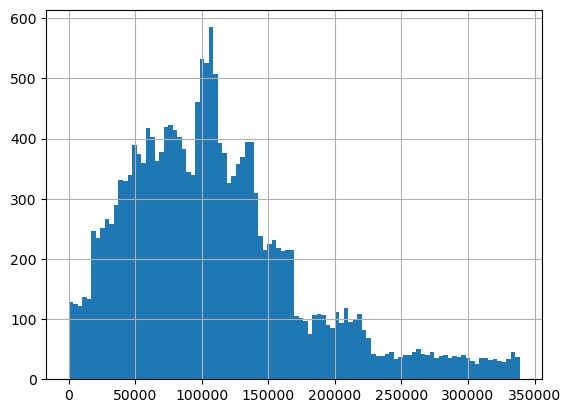

In [47]:
asim_hh_df['income'].hist(bins=100)

<Axes: >

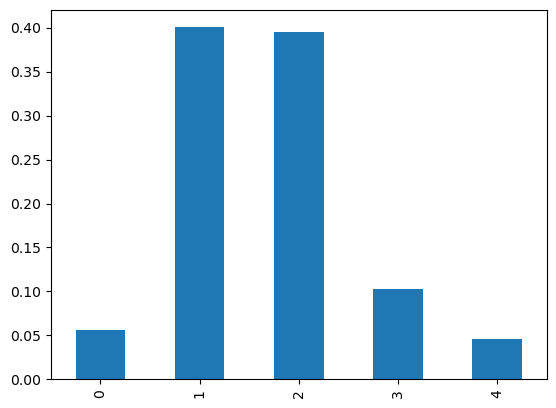

In [48]:
asim_hh_df['auto_ownership'].clip(upper=4).value_counts(dropna=False, normalize=True).loc[[0,1,2,3,4]].plot(kind='bar')

<Axes: >

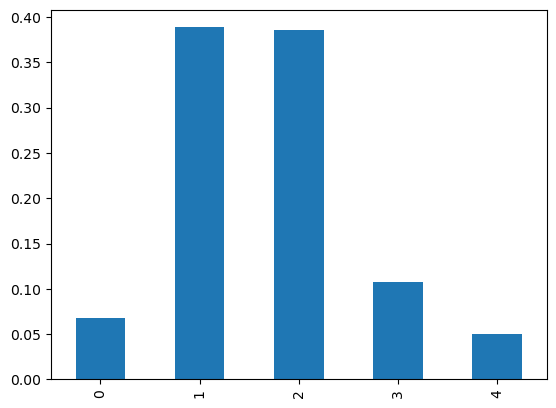

In [49]:
asim_hh_df.loc[asim_hh_df['HH_ID'].drop_duplicates().index, 'auto_ownership'].clip(upper=4).value_counts(dropna=False, normalize=True).loc[[0,1,2,3,4]].plot(kind='bar')

## Processing Person File

In [50]:
# 2022 & 2016 surveys had different age categories
age_cat_dict_22 = {
    1: [0, 5],
    2: [5, 15],
    3: [16, 17],
    4: [18, 24],
    5: [25, 34],
    6: [35, 44],
    7: [45, 54],
    8: [55, 64],
    9: [65, 74],
    10: [75, 84],
    11: [85, 90], # 85 and up
}

age_cat_dict_16 = {
    1: [0, 4],
    2: [5, 15],
    3: [16, 17],
    4: [18, 24],
    5: [25, 34],
    6: [35, 44],
    7: [45, 54],
    8: [55, 64],
    9: [65, 74],
    10: [75, 90] # 75 and up
}

def interpolate_age(row):
    age_cat = row['AGE_CAT']
    if (age_cat > 0) & (age_cat < 14):
        if row['survey_year'] == 2016:
            return np.random.randint(age_cat_dict_16[row['AGE_CAT']][0], age_cat_dict_16[row['AGE_CAT']][1] + 1)  # [low,high)
        else:
            return np.random.randint(age_cat_dict_22[row['AGE_CAT']][0], age_cat_dict_22[row['AGE_CAT']][1] + 1)
    
    # impute age based on Student and employment category
    if row['pstudent'] == 1: # school
        return 13 # non-driving age student
    elif row['pstudent'] == 2:  # university
        return 20
    else:
        return 45 # generic adult


In [51]:
asim_per_df = pd.DataFrame()

keep_cols = ['HH_ID', 'PER_ID', 'day', 'survey_year']

asim_per_df[keep_cols] = spa_out_per_df[keep_cols]
asim_per_df['ptype'] = spa_out_per_df['PERSONTYPE']
asim_per_df['pstudent'] = spa_out_per_df['STU_CAT']
asim_per_df['is_student'] = asim_per_df['pstudent'].isin([1, 2]) # school or university
asim_per_df['pemploy'] = spa_out_per_df['EMP_CAT']
asim_per_df['AGE_CAT'] = spa_out_per_df['AGE'].where(~spa_out_per_df['AGE'].isna(), spa_out_per_df['AGE'], axis=0).fillna(999)
asim_per_df['age'] = asim_per_df.apply(lambda row: interpolate_age(row), axis=1)
asim_per_df['PNUM'] = spa_out_per_df['PER_ID']

# looks like some persontypes weren't coded correctly if age is missing
asim_per_df.loc[asim_per_df['ptype'].isna() & (asim_per_df['pstudent'] == 1), 'ptype'] = 7  # school, assumed non-driving age
asim_per_df.loc[asim_per_df['ptype'].isna() & (asim_per_df['pstudent'] == 2), 'ptype'] = 3  # univ student
asim_per_df.loc[asim_per_df['ptype'].isna() & (asim_per_df['pstudent'] == 3) & (asim_per_df['pemploy'] == 4), 'ptype'] = 4  # non-worker
asim_per_df['ptype'] = asim_per_df['ptype'].astype(int)

asim_per_df['school_zone_id'] = spa_out_per_df['school_zone_id']
asim_per_df['workplace_zone_id'] = spa_out_per_df['work_zone_id']

#### merging other data from raw table that was not available in SPA output

In [52]:
# sex = 1 for male and 2 for female in ActivitySim configs & synthetic population
raw_person_22['sex'] = np.where(raw_person_22['gender'] == 2, 1, 2) # if gender is 2: Male, then Male, else Female (2: Female, 3: transgender, 4: non-binary, 999: other)
raw_person_16['sex'] = np.where(raw_person_16['gender'] == 1, 1, 2) # if gender is 1: Male, then Male, else Female (2: Female, other)

raw_person_22['work_from_home'] = (raw_person_22['job_type'] == 3) # work only from home or remotely
raw_person_16['work_from_home'] = (raw_person_16['job_type'] == 3) # work only from home or remotely

# Note: the below has companions of "work_uses_transit" for if the person USES a transit PASS
raw_person_22['transit_pass_subsidy'] = np.where(raw_person_22['work_offers_transit'] == 1, 1, 0) # Commute Benefits Provided by Employer: Free/discount transit fare
raw_person_16['transit_pass_subsidy'] = np.where(raw_person_16['work_offers_transit'] == 1, 1, 0) # Commute Subsidy: Free/subsidized transit fare (yes/no)

# no data :-(
raw_person_22['transit_pass_ownership'] = 0 #np.where(raw_person_22['transit_pass_ownership'] == 1, 1, 0) # Has a PRONTO card
raw_person_16['transit_pass_ownership'] = 0 #np.where(raw_person_16['transitpass'].isin(range(1,14)), 1, 0) # 1-13 is transit pass variant, 14 is no, 98 is don't know

# commute_subsidy_1 asks whether Employer provides free partking at work, 1: yes, 0: no, other: N/A
raw_person_22['free_parking_at_work'] = np.where(raw_person_22['work_offers_parking'] == 1, True, False)
# 1: no cost, 2: Employer pays all parking, other includes discounts, paying for pass, full cost, and N/A
raw_person_16['free_parking_at_work'] = np.where(raw_person_16['work_park_type'].isin([1,2]), True, False) 

telecommute_freq_dict_22 = {
    996: 'No_Telecommute', # never
    995: 'No_Telecommute', # missing
    1: '4_days_week', # 6-7 days a week
    2: '2_3_days_week', # 5 days a week
    3: '2_3_days_week', # 4 days a week
    4: '4_days_week', # 2-3 days a week
    5: '1_day_week', # 1 day a week
    6: '1_day_week', # 1-3 days a month
    7: 'No_Telecommute', # less than monthly
    8: 'No_Telecommute', # never
}
raw_person_22['telecommute_frequency'] = raw_person_22['telework_freq'].map(telecommute_freq_dict_22)

telecommute_freq_dict_16 = {
    1: '4_days_week', # 6-7 days a week
    2: '4_days_week', # 5 days a week
    3: '2_3_days_week', # 4 days a week
    4: '2_3_days_week', # 2-3 days a week
    5: '1_day_week', # 1 day a week
    6: '1_day_week', # 9 days every 2 weeks
    7: '1_day_week', # 1-3 days a month
    8: 'No_Telecommute', # less than monthly
    9: 'No_Telecommute', # never
    995: 'No_Telecommute', # missing
    -9998: 'No_Telecommute', # missing
}
raw_person_16['telecommute_frequency'] = raw_person_16['telework_freq'].fillna(9).map(telecommute_freq_dict_16)

# merge into asim_per_df table
raw_person_16['HH_ID'] = raw_person_16['hh_id']
raw_person_16['PER_ID'] = raw_person_16['person_num']
raw_person_22['HH_ID'] = raw_person_22['hh_id']
raw_person_22['PER_ID'] = raw_person_22['person_num']



In [53]:
# NOT USED IN MET COUNCIL
# No industry coding asked in survey

# Industry Coding
# new ABM coding (source: Grace email to Joel on 30Mar23 and forwarded to David on 4Apr23)
#[Govn't, utility/manufacturing/wholesale, military, agriculture/mining, business services, Finacnce/insurance/real estate/mgmt enterprises,
# Education, Healthcare, Retail Trade, Entertainment, Accommodation, Food Services, Construction/transporation/warehousing, other services,
# non-wage/salary WFH, non-wage / salary non-wfh]
# putting in pd.NA for no response and N/A

# FIXME: hard to separate food and accomodation, where to put fitness?
industry_coding_dict_2022 = {
    1: 'entertainment', # Arts and entertainment
    2: 'other', # Childcare (e.g., nanny, babysitter)
    3: 'construction', # Construction or landscaping
    4: 'education', # Education (public or private)
    5: 'government', # Government
    6: 'mgmt_srv', # Financial services
    7: 'healthcare', # Health care
    8: 'accomodation', # Hospitality (e.g., restaurant, accommodation)
    9: 'manufacturing', # Manufacturing (e.g., aerospace & defense, electrical, machinery)
    10: 'entertainment', # Media
    11: 'military', # Military
    12: 'agriculture', # Natural resources (e.g., forestry, fisher, energy)
    13: 'business_srv', # Professional and business services (e.g., consulting, legal, marketing)
    14: 'retail', # Personal services (e.g., hair styling, personal assistance, pet sitting)
    15: 'mgmt_srv', # Real estate
    16: 'retail', # Retail
    17: 'other', # Social assistance
    18: 'other', # Sports and fitness
    19: 'business_srv', # Technology and telecommunications
    20: 'construction', # Transportation and utilities
    997: 'other', # Other
    995: np.nan, # Missing Response
}
# raw_person_22['industry_coded'] = raw_person_22['industry'].map(industry_coding_dict_2022)

# FIXME: no government category
industry_coding_dict_2016 = {
    1: 'accomodation', # Accommodation (e.g., hotels/motels)
    2: 'mgmt_srv', # Administrative, Support, & Waste Management Services
    3: 'agriculture', # Agriculture, Forestry, Fishing, & Hunting
    4: 'entertainment', # Arts, Entertainment, & Recreation
    5: 'construction', # Construction
    6: 'education', # Education Services
    7: 'food_srv', # Food Services & Drinking Places
    8: 'mgmt_srv', # Finance & Insurance
    9: 'healthcare', # Health Care & Social Assistance
    10: 'business_srv', # Information
    11: 'mgmt_srv', # Management of Companies & Enterprises
    12: 'manufacturing', # Manufacturing
    13: 'military', # Military
    14: 'agriculture', # Mining, Quarrying, & Oil/Gas Extraction
    15: 'other', # Other Services
    16: 'business_srv', # Professional, Scientific, & Technical Services
    17: 'mgmt_srv', # Public Administration
    18: 'mgmt_srv', # Real Estate, Rental, & Leasing
    19: 'retail', # Retail Trade
    20: 'construction', # Transportation & Warehousing
    21: 'construction', # Utilities
    22: 'construction', # Wholesale Trade
    97: 'other', # Other
    98: np.nan, # Don't Know
}
# raw_person_16['industry_coded'] = raw_person_16['industry'].map(industry_coding_dict_2016)

# merge_cols = ['HH_ID', 'PER_ID', 'work_from_home', 'telecommute_frequency', 'sex',
#               'free_parking_at_work', 'transit_pass_subsidy', 'transit_pass_ownership', 'industry_coded', 'relationship']

merge_cols = ['HH_ID', 'PER_ID', 'work_from_home', 'telecommute_frequency', 'sex',
              'free_parking_at_work', 'transit_pass_subsidy', 'transit_pass_ownership', 'relationship']

raw_persons = raw_person_16[merge_cols] #pd.concat([raw_person_22[merge_cols], raw_person_16[merge_cols]])

asim_per_df = asim_per_df.merge(raw_persons, how='left', on=['HH_ID', 'PER_ID'])
asim_per_df.rename(columns={'industry_coded': 'industry'}, inplace=True)

In [54]:
asim_per_df[asim_per_df['HH_ID'] == 21001309]

,HH_ID,PER_ID,day,survey_year,ptype,pstudent,is_student,pemploy,AGE_CAT,age,PNUM,school_zone_id,workplace_zone_id,work_from_home,telecommute_frequency,sex,free_parking_at_work,transit_pass_subsidy,transit_pass_ownership,relationship


In [55]:
# NOT USED IN MET COUNCIL
# No household type coding in survey

# relationship coding: 
# 0: Self
# 1: Spouse/partner
# 2: Son/daughter/in-law
# 3: Father/mother/in-law
# 4: Brother/sister/in-law
# 5: Other relative (e.g., grandchild, cousin)
# 6: Roommate/friend
# 7: Household help
# 997 or 97: Other

# HHT coding logic
# Person 1 | HH size | Anyone identifies as spouse of p1? | Anyone identifies as roommate/help of person 1 | HHT | Description
# Male | 1 | NA | NA | 4 | 4 .Nonfamily household: Male householder: Living alone
# Female | 1 | NA | NA | 6 | 6 .Nonfamily household: Female householder: Living alone
# Male | 2 | yes | NA | 1 | 1 .Married couple household
# Female | 2 | yes | NA | 1 | 1 .Married couple household
# Male | >1 | no | No | 2 | 2 .Other family household: Male householder, no spouse present
# Female | >1 | no | No | 3 | 3 .Other family household: Female householder, no spouse present
# Male | >1 | no | yes | 5  | 5 .Nonfamily household: Male householder: Not living alone
# Female | >1 | no | yes | 7 | 7 .Nonfamily household: Female householder: Not living alone

def determine_hht(grp):
    hht = 1
    per_1_sex = grp.loc[grp['PNUM'] == 1, 'sex'].values[0]
    male_head = (per_1_sex == 1)
    hh_id = grp.HH_ID.values[0]
    # hhsize = asim_hh_df.loc[asim_hh_df['HH_ID'] == hh_id, 'hhsize'].values[0]
    hhsize = grp.PER_ID.nunique()

    # display(grp)
    if grp.relationship.isin([7]).any():
        if ~grp.relationship.isin([1]).any():
            print("here")

    if male_head & (hhsize == 1):
        hht = 4 # non-family household, male householder, living alone
    elif ~male_head & (hhsize == 1):
        hht = 6 # non-family household, female householder, living alone
    elif (hhsize >= 2) & grp.relationship.isin([1]).any():
        hht = 1 # married couple household
    elif male_head & ~(grp.relationship.isin([1,7]).any()):
        hht = 2 # other family household, male householder, no spouse
    elif ~male_head & ~(grp.relationship.isin([1,7]).any()):
        hht = 3 # other family household, female householder, no spouse
    elif male_head & ~grp.relationship.isin([1]).any() & grp.relationship.isin([7]).any():
        hht = 5 # non-family household, male householder, not living alone
    elif ~male_head & ~grp.relationship.isin([1]).any() & grp.relationship.isin([7]).any():
        hht = 7 # non-family household, female householder, not living alone
    else:
        raise RuntimeError("Bad HHT coding for group: ", grp[['HH_ID', 'sex', 'PNUM', 'relationship']], hhsize, male_head)
    # print(f"HHT: {hht}, hhsize: {hhsize}, hhid: {hh_id}, male head?: {male_head}, 1 in rel? {grp.relationship.isin([1]).any()}")
    return hht

hht_df = asim_per_df.groupby('HH_ID').apply(lambda grp: determine_hht(grp))
asim_hh_df['HHT'] = asim_hh_df.HH_ID.map(hht_df.to_dict())
asim_hh_df['HHT'].value_counts(dropna=False)

here


1    10348
4     4628
6     2697
2     1041
3      426
5        4
Name: HHT, dtype: int64

In [56]:
asim_per_df.PNUM.value_counts()

1     19144
2     11795
3      4602
4      2676
5       833
6       261
7        95
8        46
9        15
10        6
11        3
Name: PNUM, dtype: int64

In [57]:
pd.crosstab(asim_per_df['telecommute_frequency'], asim_per_df['survey_year'], dropna=False)

survey_year,2016
telecommute_frequency,
1_day_week,7721
2_3_days_week,1447
4_days_week,531
No_Telecommute,29777


In [58]:
pd.crosstab(asim_per_df['work_from_home'], asim_per_df['survey_year'], dropna=False)

survey_year,2016
work_from_home,
False,37941
True,1535


In [59]:
pd.crosstab(asim_per_df['sex'], asim_per_df['survey_year'], dropna=False)

survey_year,2016
sex,
1,20636
2,18840


In [60]:
# pd.crosstab(asim_per_df['industry'], asim_per_df['survey_year'], dropna=False, margins=True)

## Processing Tours

Tour mode coding in SPA tool:
    * 'SOV': 1,
    * 'HOV2': 2,
    * 'HOV3': 3,
    * 'WALK': 4,
    * 'BIKE': 5,
    * 'WALK-TRANSIT': 6,
    * 'PNR-TRANSIT': 7,
    * 'KNR-TRANSIT': 8,
    * 'TNC-TRANSIT': 9,
    * 'TAXI': 10,
    * 'TNC-REG': 11,
    * 'TNC-POOL': 12,
    * 'SCHOOLBUS': 13,
    * 'OTHER': 14
    
Tour purpose coding in SPA tool:
    * 'HOME':         0,
    * 'WORK':         1,
    * 'UNIVERSITY':   2,
    * 'SCHOOL':       3,
    * 'ESCORTING':    4,
    * 'SHOPPING':     5,
    * 'MAINTENANCE':  6,
    * 'EAT OUT':      7,
    * 'SOCIAL/VISIT': 8,
    * 'DISCRETIONARY':9,
    * 'WORK-RELATED': 10,
    * 'LOOP':         11,
    * 'CHANGE MODE':  12,
    * 'OTHER':        13

JOINT_STATUS coding in spa tool:
* (1) independent tours:        all trips.JOINT==NOT-JOINT
* (2) partially-joint tours:    all trips.JOINT<>JOINT; some are FULLY-JOINT, some are NOT-JOINT
* (3) fully-joint tours:        tour.get_is_fully_joint()==True
* (4) partially-joint problematic tours: some trips are NOT-JOINT, some are JOINT (not grouped)
* (5) jointness-unclear tours :    no NOT-JOINT, some are JOINT

In ActivitySim, JOINT_STATUS == 3 are considered joint tours. Only fully-joint tours have joint_tour_participants.

In [61]:
# 2016 survey was also recoded to use these modes
tour_mode_spa_to_asim_dict_22 = {
    1: 'SOV',
    2: 'HOV2',
    3: 'HOV3',
    4: 'WALK',
    5: 'BIKE',
    6: 'WALK_LOC',
    7: 'WALK_PRM',
    8: 'WALK_MIX',
    9: 'PNR_LOC',
    10: 'PNR_PRM',
    11: 'PNR_MIX',
    12: 'KNR_LOC',
    13: 'KNR_PRM',
    14: 'KNR_MIX',
    # 15: 'TNC_LOC',
    # 16: 'TNC_PRM',
    # 17: 'TNC_MIX',
    15: 'TNC_SINGLE',
    16: 'TNC_SHARED',
    17: 'TAXI',
    18: 'SCH_BUS',
    19: 'SOV', # other to SOV
    22: 'SOV' # other to SOV
}

tour_purpose_spa_to_asim_dict = {
    0: 'home', # used for trips
    1: 'work',
    2: 'univ',
    3: 'school',
    4: 'escort',
    5: 'shopping',
    6: 'othmaint',
    7: 'eatout',
    8: 'social',
    9: 'othdiscr',
    10: 'othmaint',    # work-related, no counts in this category
    11: 'othdiscr',    # Loop
    12: 'othdiscr',    # Change mode 
    -9: 'othdiscr',    # other
    
}


In [62]:
# determining parent tour purpose for subtours
spa_out_tours_df = pd.merge(
    spa_out_tours_df,
    spa_out_tours_df[['HH_ID','PER_ID','TOUR_ID', 'TOURPURP', 'day']],
    how='left',
    left_on=['HH_ID', 'PER_ID', 'PARENT_TOUR_ID', 'day'],
    right_on=['HH_ID','PER_ID','TOUR_ID', 'day'],
    suffixes=('','_y')
)
spa_out_tours_df.drop(columns='TOUR_ID_y', inplace=True)
spa_out_tours_df.rename(columns={'TOURPURP_y':'PARENT_TOURPURP'}, inplace=True)
spa_out_tours_df.head()

,HH_ID,PER_ID,TOUR_ID,ORIG_PLACENO,DEST_PLACENO,ORIG_X,ORIG_Y,ORIG_TAZ,ORIG_MAZ,DEST_X,DEST_Y,DEST_TAZ,DEST_MAZ,DEST_MODE,ORIG_MODE,TOURPURP,TOURMODE,DRIVER,ANCHOR_DEPART_HOUR,ANCHOR_DEPART_MIN,ANCHOR_DEPART_BIN,PRIMDEST_ARRIVE_HOUR,PRIMDEST_ARRIVE_MIN,PRIMDEST_ARRIVE_BIN,PRIMDEST_DEPART_HOUR,PRIMDEST_DEPART_MIN,PRIMDEST_DEPART_BIN,ANCHOR_ARRIVE_HOUR,ANCHOR_ARRIVE_MIN,ANCHOR_ARRIVE_BIN,TOUR_DUR_HR,TOUR_DUR_MIN,TOUR_DUR_BIN,MAJOR_UNIV_DEST,SPEC_EVENT_DEST,IS_SUBTOUR,PARENT_TOUR_ID,PARENT_TOUR_MODE,NUM_SUBTOURS,CHILD_TOUR_ID_1,CHILD_TOUR_ID_2,CHILD_TOUR_ID_3,ESCORTED_TOUR,CHAUFFUER_ID,ESCORTING_TOUR,NUM_PERSONS_ESCORTED,ESCORT_PERS_1,ESCORT_PERS_2,ESCORT_PERS_3,ESCORT_PERS_4,ESCORT_PERS_5,OUTBOUND_STOPS,INBOUND_STOPS,OSTOP_1_PLACENO,OSTOP_1_X,OSTOP_1_Y,OSTOP_1_TAZ,OSTOP_1_MAZ,OSTOP_1_ARR_HR,OSTOP_1_ARR_MIN,OSTOP_1_ARR_BIN,OSTOP_1_DEP_HR,OSTOP_1_DEP_MIN,OSTOP_1_DEP_BIN,OSTOP_1_DUR_HR,OSTOP_1_DUR_MIN,OSTOP_1_DUR_BIN,OSTOP_1_PURP,OSTOP_1_MODE,OSTOP_1_ESCORT_ID,OSTOP_1_PUDO,OSTOP_1_MAJUNIV,OSTOP_1_SPECEVENT,OSTOP_2_PLACENO,OSTOP_2_X,OSTOP_2_Y,OSTOP_2_TAZ,OSTOP_2_MAZ,OSTOP_2_ARR_HR,OSTOP_2_ARR_MIN,OSTOP_2_ARR_BIN,OSTOP_2_DEP_HR,OSTOP_2_DEP_MIN,OSTOP_2_DEP_BIN,OSTOP_2_DUR_HR,OSTOP_2_DUR_MIN,OSTOP_2_DUR_BIN,OSTOP_2_PURP,OSTOP_2_MODE,OSTOP_2_ESCORT_ID,OSTOP_2_PUDO,OSTOP_2_MAJUNIV,OSTOP_2_SPECEVENT,OSTOP_3_PLACENO,OSTOP_3_X,OSTOP_3_Y,OSTOP_3_TAZ,OSTOP_3_MAZ,OSTOP_3_ARR_HR,OSTOP_3_ARR_MIN,OSTOP_3_ARR_BIN,OSTOP_3_DEP_HR,OSTOP_3_DEP_MIN,OSTOP_3_DEP_BIN,OSTOP_3_DUR_HR,OSTOP_3_DUR_MIN,OSTOP_3_DUR_BIN,OSTOP_3_PURP,OSTOP_3_MODE,OSTOP_3_ESCORT_ID,OSTOP_3_PUDO,OSTOP_3_MAJUNIV,OSTOP_3_SPECEVENT,OSTOP_4_PLACENO,OSTOP_4_X,OSTOP_4_Y,OSTOP_4_TAZ,OSTOP_4_MAZ,OSTOP_4_ARR_HR,OSTOP_4_ARR_MIN,OSTOP_4_ARR_BIN,OSTOP_4_DEP_HR,OSTOP_4_DEP_MIN,OSTOP_4_DEP_BIN,OSTOP_4_DUR_HR,OSTOP_4_DUR_MIN,OSTOP_4_DUR_BIN,OSTOP_4_PURP,OSTOP_4_MODE,OSTOP_4_ESCORT_ID,OSTOP_4_PUDO,OSTOP_4_MAJUNIV,OSTOP_4_SPECEVENT,ISTOP_1_PLACENO,ISTOP_1_X,ISTOP_1_Y,ISTOP_1_TAZ,ISTOP_1_MAZ,ISTOP_1_ARR_HR,ISTOP_1_ARR_MIN,ISTOP_1_ARR_BIN,ISTOP_1_DEP_HR,ISTOP_1_DEP_MIN,ISTOP_1_DEP_BIN,ISTOP_1_DUR_HR,ISTOP_1_DUR_MIN,ISTOP_1_DUR_BIN,ISTOP_1_PURP,ISTOP_1_MODE,ISTOP_1_ESCORT_ID,ISTOP_1_PUDO,ISTOP_1_MAJUNIV,ISTOP_1_SPECEVENT,ISTOP_2_PLACENO,ISTOP_2_X,ISTOP_2_Y,ISTOP_2_TAZ,ISTOP_2_MAZ,ISTOP_2_ARR_HR,ISTOP_2_ARR_MIN,ISTOP_2_ARR_BIN,ISTOP_2_DEP_HR,ISTOP_2_DEP_MIN,ISTOP_2_DEP_BIN,ISTOP_2_DUR_HR,ISTOP_2_DUR_MIN,ISTOP_2_DUR_BIN,ISTOP_2_PURP,ISTOP_2_MODE,ISTOP_2_ESCORT_ID,ISTOP_2_PUDO,ISTOP_2_MAJUNIV,ISTOP_2_SPECEVENT,ISTOP_3_PLACENO,ISTOP_3_X,ISTOP_3_Y,ISTOP_3_TAZ,ISTOP_3_MAZ,ISTOP_3_ARR_HR,ISTOP_3_ARR_MIN,ISTOP_3_ARR_BIN,ISTOP_3_DEP_HR,ISTOP_3_DEP_MIN,ISTOP_3_DEP_BIN,ISTOP_3_DUR_HR,ISTOP_3_DUR_MIN,ISTOP_3_DUR_BIN,ISTOP_3_PURP,ISTOP_3_MODE,ISTOP_3_ESCORT_ID,ISTOP_3_PUDO,ISTOP_3_MAJUNIV,ISTOP_3_SPECEVENT,ISTOP_4_PLACENO,ISTOP_4_X,ISTOP_4_Y,ISTOP_4_TAZ,ISTOP_4_MAZ,ISTOP_4_ARR_HR,ISTOP_4_ARR_MIN,ISTOP_4_ARR_BIN,ISTOP_4_DEP_HR,ISTOP_4_DEP_MIN,ISTOP_4_DEP_BIN,ISTOP_4_DUR_HR,ISTOP_4_DUR_MIN,ISTOP_4_DUR_BIN,ISTOP_4_PURP,ISTOP_4_MODE,ISTOP_4_ESCORT_ID,ISTOP_4_PUDO,ISTOP_4_MAJUNIV,ISTOP_4_SPECEVENT,PEREXPFACT,HHEXPFACT,PERSONTYPE,FULLY_JOINT,PARTIAL_TOUR,JTOUR_ID,ERROR,JOINT_STATUS,JOINT_TOUR_PURP,DIST,OUT_ESCORT_TYPE,OUT_CHAUFFUER_ID,OUT_CHAUFFUER_PURP,OUT_CHAUFFUER_PTYPE,INB_ESCORT_TYPE,INB_CHAUFFUER_ID,INB_CHAUFFUER_PURP,INB_CHAUFFUER_PTYPE,OUT_ESCORTING_TYPE,INB_ESCORTING_TYPE,OUT_ESCORTEE_TOUR_PURP,INB_ESCORTEE_TOUR_PURP,OUT_ESCORTING_EPISODES,INB_ESCORTING_EPISODES,day,survey_year,has_external_stop,IE_open_jaw,OTAZ_ext,DTAZ_ext,external_type,PARENT_TOURPURP
0,18114244,1,1,1.0,2,-93.28638,45.01417,1191.0,NaN,-93.31758,45.05689,1105.0,NaN,2.0,2.0,5,2,0,15.0,36.0,26.0,15.0,51.0,26.0,18.0,29.0,31.0,19.0,13.0,33.0,3.0,37.0,8.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [63]:
asim_tour_df = spa_out_tours_df[
    ['HH_ID', 'PER_ID','TOUR_ID', 'PARENT_TOUR_ID', 'JTOUR_ID', 'day', 'external_type',
     'OUT_ESCORT_TYPE', 'OUT_CHAUFFUER_ID', 'OUT_CHAUFFUER_PURP',
     'INB_ESCORT_TYPE', 'INB_CHAUFFUER_ID', 'INB_CHAUFFUER_PURP',
     'OUT_ESCORTING_TYPE', 'INB_ESCORTING_TYPE', 'OUT_ESCORTEE_TOUR_PURP', 'INB_ESCORTEE_TOUR_PURP']].copy()

asim_tour_df['origin'] = spa_out_tours_df['ORIG_TAZ']
asim_tour_df['destination'] = spa_out_tours_df['DEST_TAZ']
asim_tour_df['survey_year'] = spa_out_tours_df['survey_year']

asim_tour_df['start'] = spa_out_tours_df['ANCHOR_DEPART_BIN']
asim_tour_df['end'] = spa_out_tours_df['ANCHOR_ARRIVE_BIN']
asim_tour_df['duration'] = asim_tour_df['end'] - asim_tour_df['start']

# treating joint tours as only those that have a JTOUR_ID
asim_tour_df['is_joint'] = spa_out_tours_df['JTOUR_ID'].apply(lambda x: 1 if pd.notna(x) else 0)
asim_tour_df['is_subtour'] = spa_out_tours_df['IS_SUBTOUR']

asim_tour_df.loc[asim_tour_df['start'] > num_periods, 'start'] = asim_tour_df.loc[asim_tour_df['start'] > num_periods, 'start'] - num_periods
asim_tour_df.loc[asim_tour_df['end'] > num_periods, 'end'] = asim_tour_df.loc[asim_tour_df['end'] > num_periods, 'end'] - num_periods

asim_tour_df.loc[asim_tour_df['survey_year'] == 2016, 'tour_mode'] = spa_out_tours_df.loc[
    asim_tour_df['survey_year'] == 2016, 'TOURMODE'].map(tour_mode_spa_to_asim_dict_22)
asim_tour_df.loc[asim_tour_df['survey_year'] == 2022, 'tour_mode'] = spa_out_tours_df.loc[
    asim_tour_df['survey_year'] == 2022, 'TOURMODE'].map(tour_mode_spa_to_asim_dict_22)

asim_tour_df['tour_purpose'] = spa_out_tours_df['TOURPURP'].map(tour_purpose_spa_to_asim_dict)
asim_tour_df.loc[asim_tour_df['is_subtour'] == 1, 'parent_tour_purpose'] = spa_out_tours_df.loc[
    asim_tour_df['is_subtour'] == 1, 'PARENT_TOURPURP'].map(tour_purpose_spa_to_asim_dict)

assert (~asim_tour_df['tour_mode'].isna()).all(), "Missing tour modes!"
assert (~asim_tour_df['tour_purpose'].isna()).all(), "Missing tour purpose!"


In [64]:
asim_tour_df.loc[asim_tour_df['is_subtour'] == 1, 'parent_tour_purpose'].value_counts(dropna=False)

work        9088
escort       113
othdiscr      86
eatout        74
shopping      65
univ          15
othmaint      14
social        12
Name: parent_tour_purpose, dtype: int64

In [65]:
def determine_tour_category(row):
    if (row['is_subtour'] == 1) & (row['parent_tour_purpose'] == 'work'):
        return 'atwork'
    elif row['tour_purpose'] in ['work', 'univ', 'school']:
        return 'mandatory'
    elif row['is_joint'] == 1:
        return 'joint'
    else:
        return 'non_mandatory'

def determine_tour_type(row):
    if row['tour_category'] == 'atwork':
        if row['tour_purpose'] == 'work':
            return 'business'
        elif row['tour_purpose'] == 'eatout':
            return 'eat'
        else:
            return 'maint'
    else:
        return row['tour_purpose']
    
asim_tour_df['tour_category'] = asim_tour_df.apply(lambda row: determine_tour_category(row), axis=1)
asim_tour_df['tour_type'] = asim_tour_df.apply(lambda row: determine_tour_type(row), axis=1)
# asim_tour_df.loc[asim_tour_df['tour_category'] == 'atwork', 'tour_purpose'] = 'atwork'  # has to be after tour_type calculation

In [66]:
asim_tour_df['tour_category'].value_counts(dropna=False)

non_mandatory    26607
mandatory        19647
atwork            9088
joint             5988
Name: tour_category, dtype: int64

In [67]:
pd.crosstab(asim_tour_df['tour_type'], asim_tour_df['tour_category'], margins=True)

tour_category,atwork,joint,mandatory,non_mandatory,All
tour_type,,,,,
business,6372,0,0,0,6372
eat,1441,0,0,0,1441
eatout,0,816,0,2681,3497
escort,0,1104,0,4773,5877
maint,1275,0,0,0,1275
othdiscr,0,1613,0,7900,9513
othmaint,0,606,0,4239,4845
school,0,0,3313,0,3313
shopping,0,1134,0,4826,5960


<Axes: >

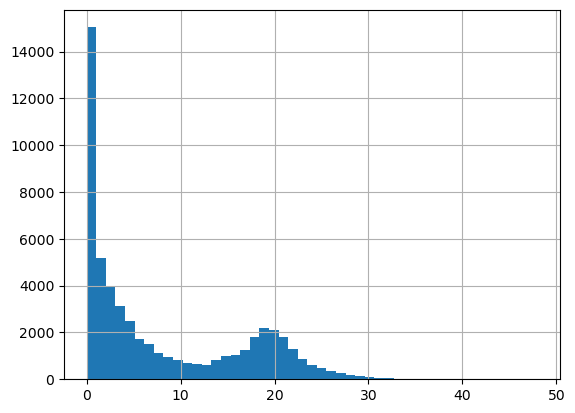

In [68]:
asim_tour_df['duration'].hist(bins=np.linspace(0,48,48))

### Joint Tour Participants

In [69]:
spa_out_ujtours_df.head()

,HH_ID,JTOUR_ID,NUMBER_HH,PERSON_1,PERSON_2,PERSON_3,PERSON_4,PERSON_5,PERSON_6,PERSON_7,PERSON_8,PERSON_9,COMPOSITION,JOINT_PURP,day,survey_year
0,18114695,1,3,1,3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3,5,1,2016
1,18114695,2,3,1,3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,2016
2,18119342,1,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,2016
3,18127925,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8,1,2016
4,18128188,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,1,2016


In [70]:
asim_jtour_participants_df = pd.melt(spa_out_ujtours_df,
       id_vars=['HH_ID', 'JTOUR_ID', 'day'],
       value_vars=['PERSON_1','PERSON_2','PERSON_3','PERSON_4','PERSON_5','PERSON_6','PERSON_7','PERSON_8','PERSON_9'])

In [71]:
asim_jtour_participants_df = asim_jtour_participants_df[pd.notna(asim_jtour_participants_df['value'])]
asim_jtour_participants_df.head()

,HH_ID,JTOUR_ID,day,variable,value
0,18114695,1,1,PERSON_1,1.0
1,18114695,2,1,PERSON_1,1.0
2,18119342,1,1,PERSON_1,2.0
3,18127925,1,1,PERSON_1,1.0
4,18128188,1,1,PERSON_1,1.0


In [72]:
asim_jtour_participants_df['participant_num'] = asim_jtour_participants_df['variable'].apply(lambda x: int(x.strip('PERSON_')))
asim_jtour_participants_df['PER_ID'] = asim_jtour_participants_df['value'].astype(int)

In [73]:
asim_jtour_participants_df

,HH_ID,JTOUR_ID,day,variable,value,participant_num,PER_ID
0,18114695,1,1,PERSON_1,1.0,1,1
1,18114695,2,1,PERSON_1,1.0,1,1
2,18119342,1,1,PERSON_1,2.0,1,2
3,18127925,1,1,PERSON_1,1.0,1,1
4,18128188,1,1,PERSON_1,1.0,1,1
...,...,...,...,...,...,...,...
18042,19432505,1,2,PERSON_7,8.0,7,8
19486,19228255,4,4,PERSON_7,7.0,7,7
20826,19324251,1,2,PERSON_8,10.0,8,10
20899,19432505,1,2,PERSON_8,9.0,8,9


## Re-Indexing
Need unique household_id, per_id, tour_id, etc. for ActivitySim


#### Household

In [74]:
# household ID should be unique already, but we want to be sure
asim_hh_df['household_id'] = asim_hh_df.reset_index().index + 1
asim_hh_df.head()

,HH_ID,home_zone_id,survey_year,hhsize,day,num_workers,auto_ownership,HH_INC_CAT,income,transponder_ownership,HHT,household_id
0,18114244,1191,2016,6,1,0,0,1,9505.56,False,1,1
1,18114304,2931,2016,1,1,1,1,6,90985.34,True,6,2
2,18114536,2583,2016,2,1,0,2,5,78468.33,True,1,3
3,18114695,2651,2016,4,1,2,2,6,88340.01,True,1,4
4,18115411,2666,2016,2,1,2,2,10,338801.12,True,1,5


#### Person

In [75]:
asim_per_df = pd.merge(
    asim_per_df,
    asim_hh_df[['HH_ID', 'household_id', 'day']],
    how='left',
    on=['HH_ID', 'day'],
)

In [76]:
asim_per_df['person_id'] = asim_per_df.reset_index().index + 1
asim_per_df.head()

,HH_ID,PER_ID,day,survey_year,ptype,pstudent,is_student,pemploy,AGE_CAT,age,PNUM,school_zone_id,workplace_zone_id,work_from_home,telecommute_frequency,sex,free_parking_at_work,transit_pass_subsidy,transit_pass_ownership,relationship,household_id,person_id
0,18114244,1,1,2016,4,3,False,3,6,43,1,-1.0,-1.0,False,No_Telecommute,1,False,0,0,0,1,1
1,18114244,2,1,2016,3,2,True,3,6,44,2,2027.0,-1.0,False,No_Telecommute,2,False,0,0,1,1,2
2,18114244,3,1,2016,6,1,True,3,3,16,3,1205.0,-1.0,False,No_Telecommute,2,False,0,0,2,1,3
3,18114244,4,1,2016,7,1,True,4,2,11,4,1205.0,-1.0,False,No_Telecommute,2,False,0,0,2,1,4
4,18114244,5,1,2016,7,1,True,4,2,11,5,-1.0,-1.0,False,No_Telecommute,1,False,0,0,2,1,5


In [77]:
# need to re-number PNUM
# not every person is listed for every day in spa output.  See HH_ID == 22008078 for an example.
# There is a cut in infer looking for PNUM == 1, which every household needs.
asim_per_df['PNUM'] = asim_per_df.groupby('household_id')['person_id'].cumcount() + 1

Determining number of children in each household

In [78]:
hh_children = asim_per_df[asim_per_df['age'] < 18].groupby('household_id')['person_id'].count().to_frame()
hh_children.columns = ['children']

In [79]:
asim_hh_df.set_index('household_id', inplace=True)
asim_hh_df.loc[hh_children.index, 'children'] = hh_children['children']
asim_hh_df['children'] = asim_hh_df['children'].fillna(0).astype(int)
asim_hh_df.reset_index(inplace=True)

#### Tour

In [80]:
asim_tour_df.head()

,HH_ID,PER_ID,TOUR_ID,PARENT_TOUR_ID,JTOUR_ID,day,external_type,OUT_ESCORT_TYPE,OUT_CHAUFFUER_ID,OUT_CHAUFFUER_PURP,INB_ESCORT_TYPE,INB_CHAUFFUER_ID,INB_CHAUFFUER_PURP,OUT_ESCORTING_TYPE,INB_ESCORTING_TYPE,OUT_ESCORTEE_TOUR_PURP,INB_ESCORTEE_TOUR_PURP,origin,destination,survey_year,start,end,duration,is_joint,is_subtour,tour_mode,tour_purpose,parent_tour_purpose,tour_category,tour_type
0,18114244,1,1,NaN,NaN,1,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1191.0,1105.0,2016,26.0,33.0,7.0,0,0,HOV2,shopping,NaN,non_mandatory,shopping
1,18114244,2,1,NaN,NaN,1,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1191.0,2027.0,2016,9.0,18.0,9.0,0,0,WALK_MIX,univ,NaN,mandatory,univ
2,18114244,2,2,NaN,NaN,1,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1191.0,1205.0,2016,24.0,30.0,6.0,0,0,WALK_LOC,othdiscr,NaN,non_mandatory,othdiscr
3,18114244,3,1,NaN,NaN,1,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1191.0,1205.0,2016,9.0,33.0,24.0,0,0,WALK_LOC,school,NaN,mandatory,school
4,18114244,4,1,NaN,NaN,1,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1191.0,1205.0,2016,9.0,30.0,21.0,0,0,WALK_LOC,school,NaN,mandatory,school


In [81]:
asim_tour_df = pd.merge(
    asim_tour_df,
    asim_per_df[['day', 'HH_ID', 'PER_ID', 'household_id', 'person_id']],
    how='left',
    on=['HH_ID', 'PER_ID', 'day']
)

Joint tours are replicated in SPA output accross all members of the tour.  asim_tour_df will keep just the first instance of joint tours.  Members of the joint tours are tracked in the asim_jtour_participants_df table.

Not removing duplicated joint tours will cause different tour_id's to be assigned to the same joint tour.

In [82]:
asim_tour_df.sort_values(by=['day', 'HH_ID', 'JTOUR_ID', 'PER_ID', 'TOUR_ID',], inplace = True)
asim_tour_df['prev_JTOUR_ID'] = asim_tour_df['JTOUR_ID'].shift(1)
asim_tour_df['prev_HH_ID'] = asim_tour_df['HH_ID'].shift(1)
same_household = (asim_tour_df['HH_ID'] == asim_tour_df['prev_HH_ID'])
same_jtour = ((asim_tour_df['prev_JTOUR_ID'] == asim_tour_df['JTOUR_ID']) & asim_tour_df['JTOUR_ID'].notna())
asim_tour_df['is_duplicated_jtour'] = 0
asim_tour_df.loc[(same_household & same_jtour), 'is_duplicated_jtour'] = 1
asim_tour_df['hh_duplicated_jtours'] = asim_tour_df.groupby(['HH_ID'])['is_duplicated_jtour'].transform('sum')
asim_tour_df.sort_values(by=['day', 'HH_ID', 'PER_ID', 'TOUR_ID'], inplace = True)
all_asim_tour_df = asim_tour_df.copy()
asim_tour_df = asim_tour_df[asim_tour_df['is_duplicated_jtour'] == 0]

In [83]:
#asim_tour_df['survey_tour_id'] = asim_tour_df['TOUR_ID']
#asim_tour_df['survey_person_id'] = asim_tour_df['PER_ID']
asim_tour_df['tour_id'] = asim_tour_df.reset_index().index + 1

# merge parent_tour_id
asim_tour_df = pd.merge(
    asim_tour_df,
    asim_tour_df[['HH_ID', 'PER_ID', 'TOUR_ID', 'tour_id', 'day']],
    how='left',
    left_on=['HH_ID', 'PER_ID', 'PARENT_TOUR_ID', 'day'],
    right_on=['HH_ID', 'PER_ID', 'TOUR_ID', 'day'],
    suffixes=('','_y')
)
asim_tour_df.drop(columns='TOUR_ID_y', inplace=True)
asim_tour_df.rename(columns={'tour_id_y':'parent_tour_id'}, inplace=True)

In [84]:
# do not allow subtours that are not joint from joint tours
asim_tour_df = asim_tour_df[~(asim_tour_df['PARENT_TOUR_ID'].notna() & asim_tour_df['parent_tour_id'].isna())]

#### Joint Tour

In [85]:
asim_jtour_participants_df.head()

,HH_ID,JTOUR_ID,day,variable,value,participant_num,PER_ID
0,18114695,1,1,PERSON_1,1.0,1,1
1,18114695,2,1,PERSON_1,1.0,1,1
2,18119342,1,1,PERSON_1,2.0,1,2
3,18127925,1,1,PERSON_1,1.0,1,1
4,18128188,1,1,PERSON_1,1.0,1,1


In [86]:
# merging person_id's separately since not every person may be listed in tour_file
asim_jtour_participants_df = pd.merge(
    asim_jtour_participants_df,
    asim_per_df[['HH_ID', 'PER_ID', 'day', 'household_id', 'person_id']],
    how='left',
    on=['HH_ID', 'PER_ID', 'day']
)

# merging tour_id 
asim_jtour_participants_df = pd.merge(
    asim_jtour_participants_df,
    asim_tour_df[['HH_ID', 'JTOUR_ID', 'tour_id', 'day']],
    how='left',
    on=['HH_ID', 'JTOUR_ID', 'day'],
)

In [87]:
asim_jtour_participants_df.sort_values(by=['household_id', 'tour_id', 'participant_num'], inplace=True)
asim_jtour_participants_df['participant_id'] = asim_jtour_participants_df.reset_index().index + 1
asim_jtour_participants_df.head()

,HH_ID,JTOUR_ID,day,variable,value,participant_num,PER_ID,household_id,person_id,tour_id,participant_id
0,18114695,1,1,PERSON_1,1.0,1,1,4,10,7,1
2857,18114695,1,1,PERSON_2,3.0,2,3,4,12,7,2
5714,18114695,1,1,PERSON_3,4.0,3,4,4,13,7,3
1,18114695,2,1,PERSON_1,1.0,1,1,4,10,8,4
2858,18114695,2,1,PERSON_2,3.0,2,3,4,12,8,5


In [88]:
all(asim_jtour_participants_df['tour_id'].isin(asim_tour_df['tour_id']))

True

## Additional changes to make infer.py work

#### "univ" is not a trip option
converting all univ trips to school

In [89]:
num_univ_tours = len(asim_tour_df[asim_tour_df['tour_type'] == 'univ'])
print("Number of univ tours: ", num_univ_tours)

Number of univ tours:  234


In [90]:
asim_tour_df.loc[asim_tour_df['tour_type'] == 'univ', 'tour_type'] = "school"

#### No joint escorting mode
error: Unable to parse string "j_escort1"

solution: recategorizing joint escort tours to non_mandatory escort tours

In [91]:
asim_tour_df[asim_tour_df['tour_type'] == 'escort']['tour_category'].value_counts()

non_mandatory    4773
joint             548
Name: tour_category, dtype: int64

In [92]:
asim_tour_df.loc[asim_tour_df['tour_type'] == 'escort', 'tour_category'] = 'non_mandatory'

In [93]:
asim_tour_df[asim_tour_df['tour_type'] == 'escort']['tour_category'].value_counts()

non_mandatory    5321
Name: tour_category, dtype: int64

## Removing tours

#### Tours with invalid start or end MAZ's are removed

In [94]:
orig_num_tours = len(asim_tour_df)
asim_tour_df = asim_tour_df[asim_tour_df['origin'].isin(landuse.zone_id)]
asim_tour_df = asim_tour_df[asim_tour_df['destination'].isin(landuse.zone_id)]
valid_maz_tours = len(asim_tour_df)
print("Removed", orig_num_tours - valid_maz_tours, "tours due to invalid tour start or end maz")
print(valid_maz_tours, " tours remain")

# removing these tours from the joint_tour_participants file
asim_jtour_participants_df = asim_jtour_participants_df[asim_jtour_participants_df['tour_id'].isin(asim_tour_df['tour_id'])]

Removed 4202 tours due to invalid tour start or end maz
53429  tours remain


In [95]:
asim_jtour_participants_df.head()

,HH_ID,JTOUR_ID,day,variable,value,participant_num,PER_ID,household_id,person_id,tour_id,participant_id
0,18114695,1,1,PERSON_1,1.0,1,1,4,10,7,1
2857,18114695,1,1,PERSON_2,3.0,2,3,4,12,7,2
5714,18114695,1,1,PERSON_3,4.0,3,4,4,13,7,3
1,18114695,2,1,PERSON_1,1.0,1,1,4,10,8,4
2858,18114695,2,1,PERSON_2,3.0,2,3,4,12,8,5


In [96]:
asim_jtour_participants_df['tot_num_participants'] = asim_jtour_participants_df.groupby('tour_id')['participant_num'].transform('max')
asim_jtour_participants_df['tot_num_participants'].value_counts(dropna=False)

2    4312
3    1257
4     516
5     115
6      48
9       9
8       8
7       7
Name: tot_num_participants, dtype: int64

### Using configs files to determine allowed tour frequencies
For example, each person can only have 2 mandatory tours

In [97]:
mand_tour_freq_alts_df = pd.read_csv(
    os.path.join(configs_dir, 'mandatory_tour_frequency_alternatives.csv'),
    comment="#")
non_mand_tour_freq_alts_df = pd.read_csv(
    os.path.join(configs_dir, 'non_mandatory_tour_frequency_alternatives.csv'),
    comment="#")
non_mand_tour_freq_alts_df['alt'] = non_mand_tour_freq_alts_df.index
joint_tour_freq_alts_df = pd.read_csv(
    os.path.join(configs_dir, 'joint_tour_frequency_alternatives.csv'),
    comment="#")
atwork_subtour_freq_alts_df = pd.read_csv(
    os.path.join(configs_dir, 'atwork_subtour_frequency_alternatives.csv'),
    comment="#")

In [98]:
def count_tours_by_category(df, category, count_by, tour_types):
    for tour_type in tour_types:
        count_name = category + "_" + tour_type
        print(tour_type)
        df[count_name] = \
            df[(df['tour_category'] == category) & (df['tour_type'] == tour_type)] \
            .groupby(count_by).cumcount() + 1
        df.loc[(df[count_by] != df.shift(1)[count_by]) & pd.isna(df[count_name]), count_name] = 0
        df[count_name].ffill(inplace=True)
    return df

In [99]:
# - checking mandatory tour frequency
mand_tour_types = list(mand_tour_freq_alts_df.columns.drop('alt'))
asim_tour_df = count_tours_by_category(
    df=asim_tour_df,
    category='mandatory',
    count_by='person_id',
    tour_types=mand_tour_types
)

asim_tour_df = pd.merge(
    asim_tour_df,
    mand_tour_freq_alts_df,
    how='left',
    right_on=mand_tour_types,
    left_on=['mandatory_' + tour_type for tour_type in mand_tour_types]
)
asim_tour_df.drop(labels=mand_tour_types, axis='columns', inplace=True)
asim_tour_df.rename(columns={'alt': 'mandatory_alt'}, inplace=True)
asim_tour_df[asim_tour_df['tour_category'] == 'mandatory']['mandatory_alt'].value_counts(dropna=False)

work
school


work1              14200
school1             3014
work2                925
NaN                  186
school2               56
work_and_school       32
Name: mandatory_alt, dtype: int64

In [100]:
asim_tour_df['mandatory_school'].value_counts()

0.0    49842
1.0     3511
2.0       76
Name: mandatory_school, dtype: int64

In [101]:
# - checking non_mandatory tour frequency
non_mand_tour_types = list(non_mand_tour_freq_alts_df.columns.drop('alt'))
asim_tour_df = count_tours_by_category(
    df=asim_tour_df,
    category='non_mandatory',
    count_by='person_id',
    tour_types=non_mand_tour_types
)

asim_tour_df = pd.merge(
    asim_tour_df,
    non_mand_tour_freq_alts_df,
    how='left',
    right_on=non_mand_tour_types,
    left_on=['non_mandatory_' + tour_type for tour_type in non_mand_tour_types]
)
asim_tour_df.drop(labels=non_mand_tour_types, axis='columns', inplace=True)
asim_tour_df.rename(columns={'alt': 'non_mandatory_alt'}, inplace=True)
asim_tour_df[asim_tour_df['tour_category'] == 'non_mandatory']['non_mandatory_alt'].value_counts(dropna=False)

escort
shopping
othmaint
othdiscr
eatout
social


1.0     5135
32.0    3624
16.0    3312
NaN     2352
8.0     2285
        ... 
85.0       1
89.0       1
27.0       1
62.0       1
46.0       1
Name: non_mandatory_alt, Length: 70, dtype: int64

In [102]:
# - checking atwork tour frequency
atwork_subtour_types = list(atwork_subtour_freq_alts_df.columns.drop('alt'))
asim_tour_df = count_tours_by_category(
    df=asim_tour_df,
    category='atwork',
    count_by='parent_tour_id',
    tour_types=atwork_subtour_types
)

asim_tour_df = pd.merge(
    asim_tour_df,
    atwork_subtour_freq_alts_df,
    how='left',
    right_on=atwork_subtour_types,
    left_on=['atwork_' + tour_type for tour_type in atwork_subtour_types]
)
asim_tour_df.drop(labels=atwork_subtour_types, axis='columns', inplace=True)
asim_tour_df.rename(columns={'alt': 'atwork_alt'}, inplace=True)
asim_tour_df[asim_tour_df['tour_category'] == 'atwork']['atwork_alt'].value_counts(dropna=False)

eat
business
maint


NaN             2723
business1       2579
business2       1221
eat             1076
maint            904
eat_business     275
Name: atwork_alt, dtype: int64

In [103]:
asim_tour_df[asim_tour_df['tour_category'] == 'atwork']['tour_type'].value_counts()

business    6140
eat         1391
maint       1247
Name: tour_type, dtype: int64

In [104]:
# - checking joint tour frequency
# FIXME need to modify to match new joint_tour_frequency_composition model
joint_tour_types = list(joint_tour_freq_alts_df.columns.drop('alt'))
asim_tour_df = count_tours_by_category(
    df=asim_tour_df,
    category='joint',
    count_by='household_id',
    tour_types=joint_tour_types
)

# merging joint tour alternatives
asim_tour_df = pd.merge(
    asim_tour_df,
    joint_tour_freq_alts_df,
    how='left',
    right_on=joint_tour_types,
    left_on=['joint_' + tour_type for tour_type in joint_tour_types]
)
asim_tour_df.drop(labels=joint_tour_types, axis='columns', inplace=True)
asim_tour_df.rename(columns={'alt': 'joint_alt'}, inplace=True)
asim_tour_df[asim_tour_df['tour_category'] == 'joint']['joint_alt'].value_counts(dropna=False)

shopping
othmaint
eatout
social
othdiscr


1_Disc     564
1_Shop     434
1_Eat      320
1_Visit    230
1_Main     219
2_DD        44
2_SD        38
NaN         21
2_MD        21
2_SM        17
2_ED        16
2_SE        12
2_SS        12
2_SV        12
2_VD        11
2_MM         9
2_VV         8
2_ME         7
2_EV         6
2_MV         4
2_EE         4
Name: joint_alt, dtype: int64

In [105]:
asim_tour_df['keep_tour'] = 1
original_num_tours = len(asim_tour_df)

asim_tour_df.loc[(asim_tour_df['tour_category'] == 'mandatory') & pd.isna(asim_tour_df['mandatory_alt']), 'keep_tour'] = 0
asim_tour_df.loc[(asim_tour_df['tour_category'] == 'non_mandatory') & pd.isna(asim_tour_df['non_mandatory_alt']), 'keep_tour'] = 0
asim_tour_df.loc[(asim_tour_df['tour_category'] == 'atwork') & pd.isna(asim_tour_df['atwork_alt']), 'keep_tour'] = 0
asim_tour_df.loc[(asim_tour_df['tour_category'] == 'joint') & pd.isna(asim_tour_df['joint_alt']), 'keep_tour'] = 0

after_removed_tours = len(asim_tour_df[asim_tour_df['keep_tour'] == 1])
print("Removed ", original_num_tours - after_removed_tours, "tours that did not match in the tour frequency configs files")

Removed  5282 tours that did not match in the tour frequency configs files


In [106]:
# do not allow 
original_num_tours = asim_tour_df['keep_tour'].sum()

asim_tour_df.loc[(asim_tour_df['is_subtour'] == 1) & (asim_tour_df['parent_tour_purpose'] != 'work'), 'keep_tour'] = 0

after_removed_tours = asim_tour_df['keep_tour'].sum()
print("Removed ", original_num_tours - after_removed_tours, "subtours without a parent work purpose")

Removed  227 subtours without a parent work purpose


In [107]:
### Marking tours that could be part of extension model
# FIXME: should be grabbing this from configs
asim_tour_df['included_by_extension_model'] = 0
asim_tour_df.loc[(asim_tour_df['keep_tour']==0)&
                 (asim_tour_df['tour_category']=='non_mandatory')&
                 (asim_tour_df['non_mandatory_escort']<=4)&
                 (asim_tour_df['non_mandatory_shopping']<=4)&
                 (asim_tour_df['non_mandatory_othmaint']<=4)&
                 (asim_tour_df['non_mandatory_othdiscr']<=4)&
                 (asim_tour_df['non_mandatory_eatout']<=3)&
                 (asim_tour_df['non_mandatory_social']<=3), 'included_by_extension_model'] = 1

In [108]:
asim_tour_df

,HH_ID,PER_ID,TOUR_ID,PARENT_TOUR_ID,JTOUR_ID,day,external_type,OUT_ESCORT_TYPE,OUT_CHAUFFUER_ID,OUT_CHAUFFUER_PURP,INB_ESCORT_TYPE,INB_CHAUFFUER_ID,INB_CHAUFFUER_PURP,OUT_ESCORTING_TYPE,INB_ESCORTING_TYPE,OUT_ESCORTEE_TOUR_PURP,INB_ESCORTEE_TOUR_PURP,origin,destination,survey_year,start,end,duration,is_joint,is_subtour,tour_mode,tour_purpose,parent_tour_purpose,tour_category,tour_type,household_id,person_id,prev_JTOUR_ID,prev_HH_ID,is_duplicated_jtour,hh_duplicated_jtours,tour_id,parent_tour_id,mandatory_work,mandatory_school,mandatory_alt,non_mandatory_escort,non_mandatory_shopping,non_mandatory_othmaint,non_mandatory_othdiscr,non_mandatory_eatout,non_mandatory_social,non_mandatory_alt,atwork_eat,atwork_business,atwork_maint,atwork_alt,joint_shopping,joint_othmaint,joint_eatout,joint_social,joint_othdiscr,joint_alt,keep_tour,included_by_extension_model
0,18114244,1,1,NaN,NaN,1,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1191.0,1105.0,2016,26.0,33.0,7.0,0,0,HOV2,shopping,NaN,non_mandatory,shopping,1,1,NaN,NaN,0,6,1,NaN,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,no_subtours,0.0,0.0,0.0,0.0,0.0,0_tours,1,0
1,18114244,2,1,NaN,NaN,1,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1191.0,2027.0,2016,9.0,18.0,9.0,0,0,WALK_MIX,univ,NaN,mandatory,school,1,2,NaN,18114244.0,0,6,2,NaN,0.0,1.0,school1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no_subtours,0.0,0.0,0.0,0.0,0.0,0_tours,1,0
2,18114244,2,2,NaN,NaN,1,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1191.0,1205.0,2016,24.0,30.0,6.0,0,0,WALK_LOC,othdiscr,NaN,non_mandatory,othdiscr,1,2,NaN,18114244.0,0,6,3,NaN,0.0,1.0,school1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,no_subtours,0.0,0.0,0.0,0.0,0.0,0_tours,1,0
3,18114244,3,1,NaN,NaN,1,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1191.0,1205.0,2016,9.0,33.0,24.0,0,0,WALK_LOC,school,NaN,mandatory,school,1,3,NaN,18114244.0,0,6,4,NaN,0.0,1.0,school1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no_subtours,0.0,0.0,0.0,0.0,0.0,0_tours,1,0
4,18114244,4,1,NaN,NaN,1,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1191.0,1205.0,2016,9.0,30.0,21.0,0,0,WALK_LOC,school,NaN,mandatory,school,1,4,NaN,18114244.0,0,6,5,NaN,0.0,1.0,school1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no_subtours,0.0,0.0,0.0,0.0,0.0,0_tours,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53424,19999572,2,1,NaN,NaN,4,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1857.0,2085.0,2016,10.0,31.0,21.0,0,0,SOV,work,NaN,mandatory,work,19144,39474,NaN,19999572.0,0,8,57631,NaN,1.0,0.0,work1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no_subtours,0.0,0.0,0.0,0.0,0.0,0_tours,1,0
53425,19999572,2,2,NaN,NaN,4,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1857.0,1861.0,2016,35.0,36.0,1.0,0,0,HOV2,shopping,NaN,non_mandatory,shopping,19144,39474,NaN,19999572.0,0,8,57632,NaN,1.0,0.0,work1,0.0,1.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,no_subtours,0.0,0.0,0.0,0.0,0.0,0_tours,1,0
53426,19999572,2,3,1.0,NaN,4,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,2085.0,400.0,2016,28.0,28.0,0.0,0,1,SOV,work,work,atwork,business,19144,39474,NaN,19999572.0,0,8,57633,57631.0,1.0,0.0,work1,0.0,1.0,0.0,0.0,0.0,0.0,16.0,0.0,1.0,0.0,business1,0.0,0.0,0.0,0.0,0.0,0_tours,1,0
53427,19999572,2,4,1.0,NaN,4,II,3,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,400.0,1913.0,2016,28.0,29.0,1.0,0,1,SOV,work,work,atwork,business,19144,39474,NaN,19999572.0,0,8,57634,57631.0,1.0,0.0,work1,0.0,1.0,0.0,0.0,0.0,0.0,16.0,0.0,2.0,0.0,business2,0.0,0.0,0.0,0.0,0.0,0_tours,1,0


### If person takes a work tour, they can't work from home

In [109]:
people_taking_work_tours = asim_tour_df.loc[asim_tour_df['tour_purpose'] == 'work', 'person_id']
wfh_and_work_tour = asim_per_df.loc[asim_per_df['work_from_home'] & asim_per_df['person_id'].isin(people_taking_work_tours), 'person_id']
print(f"Changing work from home from True to False for {len(wfh_and_work_tour)} people that take a work tour")
asim_per_df.loc[asim_per_df['person_id'].isin(wfh_and_work_tour), 'work_from_home'] = False

Changing work from home from True to False for 134 people that take a work tour


#### Tour Start and End times must be acceptable
Checking the tour_departure_and_duration_alternatives.csv configs file for allowable times

In [110]:
tdd_df = pd.read_csv(os.path.join(configs_dir, "tour_departure_and_duration_alternatives.csv"))
min_start_allowed = tdd_df['start'].min()
max_start_allowed = tdd_df['start'].max()
min_end_allowed = tdd_df['end'].min()
max_end_allowed = tdd_df['end'].max()

In [111]:
count_before_tdd = len(asim_tour_df[asim_tour_df['keep_tour'] == 1])
asim_tour_df.loc[
    (asim_tour_df['start'] < min_start_allowed)
    | (asim_tour_df['start'] > max_start_allowed)
    | (asim_tour_df['end'] < min_end_allowed)
    | (asim_tour_df['end'] > max_end_allowed)
    | pd.isna(asim_tour_df['start'])
    | pd.isna(asim_tour_df['end'])
    | (asim_tour_df['start'] > asim_tour_df['end']), 'keep_tour'] = 0

count_after_tdd = len(asim_tour_df[asim_tour_df['keep_tour'] == 1])

print("Removed an additional", count_before_tdd - count_after_tdd, "tours due to bad start/end times")

Removed an additional 3118 tours due to bad start/end times


### Reassigning tours from persons that make work or school trip but have invalid work or school MAZ

In [112]:
asim_per_df.loc[(asim_per_df['school_zone_id'].isin([0,-9999])) | (asim_per_df['school_zone_id'].isna()), 'school_zone_id'] = -1
asim_per_df.loc[(asim_per_df['workplace_zone_id'].isin([0,-9999])) | (asim_per_df['workplace_zone_id'].isna()), 'workplace_zone_id'] = -1

<Axes: >

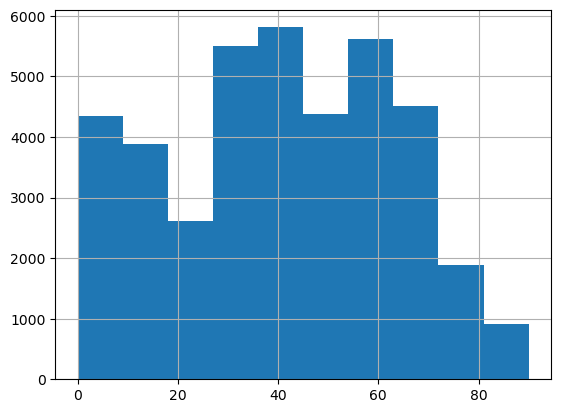

In [113]:
asim_per_df['age'].hist()

In [114]:
univ_students = (asim_per_df['pstudent'] == 2)
gradeschool_students = ((asim_per_df['pstudent'] == 1) & (asim_per_df['age'] < 14))
highschool_students = ((asim_per_df['pstudent'] == 1) & (asim_per_df['age'] >= 14))

In [115]:
landuse

,zone_id,ZONEID,POPULATION,HOUSEHOLDS,RET_EMP,NRET_EMP,AMC_EMP,MAN_EMP,OFF_EMP,MED1_EMP,MED2_EMP,RST_EMP,K12_EMP,ENT_EMP,TOT_EMP,ZONE_y,ZONE_y.1,ZONE_y_1,AREA,MIX_DENS,TERM_TIME,PARK_COST,NONWRKPRK,ENROLLED,ENROLLED2,ENROLLED5,ENROLLED10,TETRACC15,TEHWYACC10,REHWYACC10,NEHWYACC10,MEHWYACC10,EXT_DIST,CBD,SUBURB3,SUBURB2,RURAL,HHDENSITY,LOGMXDENS,RETEMPDEN,POPDENS,TOTEMPDEN,TRHWACCRAT,TW_ACC,SCH1NUM1,SCH1NUM2,SCH1NUM3,SCH1NUM4,SCH1NUM5,SCH1NUM6,SCH1NUM7,SCH1NUM8,SCH1NUM9,SCH1NUM10,SCH2NUM1,SCH2NUM2,SCH2NUM3,SCH2NUM4,SCH2NUM5,SCH2NUM6,SCH2NUM7,SCH2NUM8,SCH2NUM9,SCH2NUM10,SCH3NUM1,SCH3NUM2,SCH3NUM3,SCH3NUM4,SCH3NUM5,SCH3NUM6,SCH3NUM7,SCH3NUM8,SCH3NUM9,SCH3NUM10,DISTRICT,area_type,K_8,G9_12,COUNTY,STATEFP,ML_DIST
0,1.0,1.0,85,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,5.45117,0.00000,1,0,0,0,0,0,0,0.0,5.843916,4.270736,5.615147,0.029840,17.29,0,0,0,1,5.870299,0.000000,0.000000,15.592983,0.000000,2.55075,1,6,86,136,0,0,0,0,0,0,0,6,7,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,14,4,0.0,0.0,Anoka,27,28.475000
1,2.0,2.0,534,169,0.0,153.0,1.0,10.0,142.0,0.0,0.0,0.0,0.0,0.0,153.0,2,2,2,3.28617,0.00000,1,0,0,0,0,0,0,0.0,6.695728,5.080955,6.475455,0.054068,14.10,0,0,0,1,51.427650,0.000000,0.000000,162.499201,46.558760,2.18668,1,6,86,136,0,0,0,0,0,0,0,6,7,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,14,4,69.0,145.0,Anoka,27,26.629999
2,3.0,3.0,151,51,8.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3,3,3,2.70788,0.00000,1,0,0,0,0,0,0,0.0,6.480769,4.861809,6.261901,0.051695,15.37,0,0,0,1,18.833922,1.268004,2.954341,55.763180,4.062218,2.27203,1,6,86,136,0,0,0,0,0,0,0,6,7,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,14,4,0.0,0.0,Anoka,27,26.989000
3,4.0,4.0,1076,338,18.0,8.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,26.0,4,4,4,1.42696,6.13967,1,0,0,0,0,0,0,0.0,6.946256,5.419451,6.702570,0.073260,13.38,0,0,0,1,236.867186,2.563135,12.614229,754.050569,18.220553,2.10348,1,6,86,136,0,0,0,0,0,0,0,6,7,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,14,4,0.0,0.0,Anoka,27,25.908001
4,5.0,5.0,1147,456,242.0,91.0,0.0,5.0,86.0,0.0,0.0,0.0,0.0,0.0,333.0,5,5,5,0.45307,174.21885,2,0,0,0,0,0,0,0.0,7.104821,5.622231,6.848343,0.095505,12.44,0,0,1,0,1006.466992,5.857782,534.133798,2531.617631,734.985764,2.05334,1,6,86,136,0,0,0,0,0,0,0,6,7,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,14,3,0.0,0.0,Anoka,27,24.972000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,3026.0,3026.0,28,10,0.0,11.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,3026,3026,3026,0.44770,0.00000,1,0,0,0,0,0,0,0.0,7.116064,5.434860,6.911083,0.000018,9.97,0,0,0,1,22.336386,0.000000,0.000000,62.541881,24.570025,2.02661,1,3025,0,0,0,0,0,0,0,0,0,3025,0,0,0,0,0,0,0,0,0,3025,0,0,0,0,0,0,0,0,0,26,4,0.0,0.0,Polk,55,49.252998
3026,3027.0,3027.0,147,51,152.0,295.0,227.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,447.0,3027,3027,3027,0.32332,111.76897,1,0,0,0,0,0,0,0.0,7.172436,5.535310,6.957049,0.000019,9.91,0,0,0,1,157.738463,4.780044,470.122479,454.657924,1382.531238,2.00875,1,3025,0,0,0,0,0,0,0,0,0,3025,0,0,0,0,0,0,0,0,0,3025,0,0,0,0,0,0,0,0,0,26,4,0.0,0.0,Polk,55,49.199001
3027,3028.0,3028.0,630,286,54.0,1181.0,293.0,18.0,870.0,0.0,0.0,0.0,0.0,0.0,1235.0,3028,3028,3028,0.77765,0.00000,1,0,0,0,0,0,0,0.0,7.360892,5.437730,7.203643,0.000013,8.43,0,0,0,1,367.774706,4.084484,69.439979,810.133093,1588.118048,1.95298,1,3025,0,0,0,0,0,0,0,0,0,3025,0,0,0,0,0,0,0,0,0,3025,0,0,0,0,0,0,0,0,0,26,4,1064.0,462.0,Polk,55,50.587002
3028,3029.0,3029.0,837,255,0.0,20.0,15.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,20.0,3029,3029,3029,14.80920,0.00000,1,0,0,0,0,0,0,0.0,6.006979,4.237195,5.823167,0.000100,20.54,0,0,0,1,17.219026,0.000000,0.000000,56.518921,1.350512,2.43710,1,3008,2981,0,0,0,0,0,0,0,0,2981,0,0,0,0,0,0,0,0,0,2981,0,0,0,0,0,0,0,0,0,26,4,0.0,0.0,Polk,55,44.220001


In [116]:
landuse['tot_college_enroll'] = landuse['ENROLLED'] #+ landuse['othercollegeenroll'] + landuse['adultschenrl']
univ_mazs = landuse[landuse['tot_college_enroll'] > 0]['zone_id']
k_8_mazs = landuse[landuse['K_8'] > 0]['zone_id']
G9_12_mazs = landuse[landuse['G9_12'] > 0]['zone_id']
print(len(univ_mazs), 'TAZs with university enrollment')
print(len(k_8_mazs), 'TAZs with K-8 enrollment')
print(len(G9_12_mazs), 'TAZs with 9-12 enrollment')

85 TAZs with university enrollment
638 TAZs with K-8 enrollment
309 TAZs with 9-12 enrollment


In [117]:
def make_school_co(asim_per_df):
    school_co = asim_per_df[univ_students | gradeschool_students | highschool_students].copy()
    school_co['school_segment_named'] = 'university'
    school_co.loc[highschool_students, 'school_segment_named'] = 'highschool'
    school_co.loc[gradeschool_students, 'school_segment_named'] = 'gradeschool'
    school_co['has_landuse_taz'] = 0
    school_co.loc[(univ_students & (school_co['school_zone_id'].isin(univ_mazs)))
                  | (highschool_students & (school_co['school_zone_id'].isin(G9_12_mazs)))
                  | (gradeschool_students & (school_co['school_zone_id'].isin(k_8_mazs))),
                'has_landuse_taz'] = 1
    return school_co
school_co = make_school_co(asim_per_df)

In [118]:
def make_missing_school_maz_df(school_co):
    missing_maz_df = pd.DataFrame({
        'survey_total': school_co['school_segment_named'].value_counts(),
        'survey_missing_taz': school_co[school_co['school_zone_id'] == -1]['school_segment_named'].value_counts(),
        'has_valid_maz': school_co[school_co['has_landuse_taz'] == 1]['school_segment_named'].value_counts()
    })
    missing_maz_df.loc['total'] = missing_maz_df.sum()
    missing_maz_df['percent_missing'] = missing_maz_df['survey_missing_taz'] / missing_maz_df['survey_total'] * 100
    missing_maz_df['percent_valid'] = missing_maz_df['has_valid_maz'] / missing_maz_df['survey_total'] * 100
    return missing_maz_df

make_missing_school_maz_df(school_co)

,survey_total,survey_missing_taz,has_valid_maz,percent_missing,percent_valid
gradeschool,6578,1637,3405,24.885984,51.763454
highschool,1788,203,977,11.353468,54.642058
university,1063,100,717,9.407338,67.450611
total,9429,1940,5099,20.574822,54.077845


In [119]:
bad_school_co = school_co[school_co['has_landuse_taz'] == 0]
bad_school_co_by_maz = bad_school_co.groupby(['school_zone_id', 'school_segment_named']).count().reset_index()
bad_school_co_by_maz = bad_school_co_by_maz.pivot_table(index='school_zone_id', columns='school_segment_named', values='person_id')
bad_school_co_by_maz = bad_school_co_by_maz.reset_index()
bad_school_co_by_maz = bad_school_co_by_maz.rename(columns={'school_zone_id': 'TAZ'}).fillna(0)
bad_school_co_by_maz = bad_school_co_by_maz[bad_school_co_by_maz['TAZ'] > 0]
bad_school_co_by_maz
# bad_school_co_by_maz.astype(int).to_csv('reported_school_locations_without_enrollment.csv', index=False)

school_segment_named,TAZ,gradeschool,highschool,university
1,6.0,0.0,1.0,0.0
2,11.0,1.0,0.0,0.0
3,19.0,1.0,0.0,0.0
4,39.0,3.0,0.0,0.0
5,56.0,0.0,1.0,0.0
...,...,...,...,...
550,3050.0,0.0,0.0,2.0
551,3051.0,0.0,0.0,2.0
552,3053.0,0.0,0.0,8.0
553,3058.0,9.0,4.0,28.0


In [120]:
maz_shp_landuse = pd.merge(taz, landuse, how='left', left_on='TAZ', right_on='zone_id')
# maz_shp_landuse = geopandas.GeoDataFrame(maz_shp_landuse, geometry='geometry', crs=mgra15.crs)
maz_shp_landuse = maz_shp_landuse.to_crs(epsg=state_plane_epsg)  # CA state plane 6 (feet)

In [121]:
bad_school_shp = pd.merge(bad_school_co_by_maz, taz, how='left', left_on='TAZ', right_on='TAZ')
bad_school_shp = geopandas.GeoDataFrame(bad_school_shp, geometry='geometry', crs=taz.crs)
# ignore external zones
bad_school_shp = bad_school_shp[~bad_school_shp['geometry'].isna()]
bad_school_shp = bad_school_shp.to_crs(epsg=state_plane_epsg)  # CA state plane 6 (feet)

In [122]:
def find_closest_valid_maz(row, maz_shp_landuse):
    if (row.TAZ < 0) | pd.isna(row.TAZ):
        return row
    centroid = row['geometry']
    
    if row.gradeschool > 0:
        gradeschool_mazs = maz_shp_landuse[maz_shp_landuse['K_8'] > 0].reset_index(drop=True)
        distances = [centroid.distance(geom) for geom in gradeschool_mazs['geometry']]
        row['closest_gradeschool_distance'] = np.amin(distances) / 5280 # ft to miles
        row['closest_gradeschool_taz'] = gradeschool_mazs.loc[np.argmin(distances), 'TAZ']
        
    if row.highschool > 0:
        highschool_mazs = maz_shp_landuse[maz_shp_landuse['G9_12'] > 0].reset_index(drop=True)
        distances = [centroid.distance(geom) for geom in highschool_mazs['geometry']]
        row['closest_highschool_distance'] = np.amin(distances) / 5280 # ft to miles
        row['closest_highschool_taz'] = highschool_mazs.loc[np.argmin(distances), 'TAZ']
    
    if row.university > 0:
        univ_mazs = maz_shp_landuse[maz_shp_landuse['tot_college_enroll'] > 0].reset_index(drop=True)
        distances = [centroid.distance(geom) for geom in univ_mazs['geometry']]
        row['closest_university_distance'] = np.amin(distances) / 5280 # ft to miles
        row['closest_university_taz'] = univ_mazs.loc[np.argmin(distances), 'TAZ']
    return row
    
school_reassign = bad_school_shp.apply(lambda row: find_closest_valid_maz(row, maz_shp_landuse), axis=1)

In [123]:
# school_reassign['closest_gradeschool_distance'].hist(bins=20)
# plt.xlabel("Distance [miles]")
# plt.title("Center of Invalid MAZ to closest valid MAZ")
# plt.ylabel("Gradeschool Counts")
# plt.show()

In [124]:
# school_reassign['closest_highschool_distance'].hist(bins=20)
# plt.xlabel("Distance [miles]")
# plt.title("Center of Invalid MAZ to closest valid MAZ")
# plt.ylabel("Highschool Counts")
# plt.show()

In [125]:
# # univ_reassign_mazs = (school_reassign['closest_univ_maz'].notna())
# asim_per_with_school_df = pd.merge(asim_per_df, school_reassign, how='left', left_on='school_zone_id', right_on='TAZ')
# # asim_per_with_school_df.head()
# asim_per_with_school_df.loc[univ_students, 'school_zone_id'] = np.where(
#     asim_per_with_school_df.loc[univ_students, 'closest_university_taz'].isna(),
#     asim_per_with_school_df.loc[univ_students, 'school_zone_id'],
#     asim_per_with_school_df.loc[univ_students, 'closest_university_taz'])
# asim_per_with_school_df.loc[gradeschool_students, 'school_zone_id'] = np.where(
#     asim_per_with_school_df.loc[gradeschool_students, 'closest_gradeschool_taz'].isna(),
#     asim_per_with_school_df.loc[gradeschool_students, 'school_zone_id'],
#     asim_per_with_school_df.loc[gradeschool_students, 'closest_gradeschool_taz'])
# asim_per_with_school_df.loc[highschool_students, 'school_zone_id'] = np.where(
#     asim_per_with_school_df.loc[highschool_students, 'closest_highschool_taz'].isna(),
#     asim_per_with_school_df.loc[highschool_students, 'school_zone_id'],
#     asim_per_with_school_df.loc[highschool_students, 'closest_highschool_taz'])
# num_reassigned = (asim_per_with_school_df['school_zone_id'] != asim_per_df['school_zone_id']).sum()
# asim_per_df['school_zone_id'] = asim_per_with_school_df['school_zone_id']
# print("Number of invalid school TAZ's reassigned:", num_reassigned)

In [126]:
new_school_co = make_school_co(asim_per_df)
make_missing_school_maz_df(new_school_co)

,survey_total,survey_missing_taz,has_valid_maz,percent_missing,percent_valid
gradeschool,6578,1637,3405,24.885984,51.763454
highschool,1788,203,977,11.353468,54.642058
university,1063,100,717,9.407338,67.450611
total,9429,1940,5099,20.574822,54.077845


In [127]:
people_with_invalid_school_maz = asim_per_df.loc[asim_per_df['school_zone_id'] <= 0, 'person_id']
asim_tour_df.loc[
    (asim_tour_df['tour_type'] == 'school') 
    & asim_tour_df['person_id'].isin(people_with_invalid_school_maz),
    'keep_tour'] = 0

### If person makes a work tour, but has an invalid (missing) workplace maz, use the first work tour destination as workplace maz

In [128]:
asim_per_df[asim_per_df.workplace_zone_id > 3061].workplace_zone_id.value_counts()

Series([], Name: workplace_zone_id, dtype: int64)

In [129]:
people_with_invalid_work_maz = asim_per_df.loc[asim_per_df['workplace_zone_id'] <= 0, 'person_id']

In [130]:
inferred_workplace_mazs = asim_tour_df[(asim_tour_df['tour_type'] == 'work') & asim_tour_df['person_id'].isin(people_with_invalid_work_maz)][['destination', 'person_id']]
inferred_workplace_mazs = inferred_workplace_mazs.drop_duplicates('person_id', keep='first')
inferred_workplace_mazs.set_index('person_id', inplace=True)
print("Inferred workplace maz for people that have a workplace zone_id missing but make a work tour: ")
inferred_workplace_mazs

Inferred workplace maz for people that have a workplace zone_id missing but make a work tour: 


,destination
person_id,
36,1592.0
143,547.0
278,2894.0
465,264.0
513,5.0
...,...
38752,1521.0
38924,1130.0
38989,220.0


In [131]:
asim_per_df.set_index('person_id', inplace=True)
asim_per_df.loc[inferred_workplace_mazs.index, 'workplace_zone_id'] = inferred_workplace_mazs['destination']
asim_per_df.reset_index(inplace=True)

#### Change people that go to school and not work, but say they are workers
Had a problem where an individual says they are a full time worker and a university student, but do not provide a work location and do not take a work tour, but do take a school tour. school_zone_id was changed to -1 after initialize households (full time workers do not get a school location), but cdap has 1 M school tour.  Since school_zone_id changed to -1, caused 0 probs error in mandatory tour frequency.

In [132]:
people_making_work_tours = asim_tour_df.loc[
    (asim_tour_df['tour_type'] == 'work')
    & (asim_tour_df['keep_tour'] == 1), 'person_id'].unique()
people_making_school_tours = asim_tour_df.loc[
    (asim_tour_df['tour_type'] == 'school') 
    & (asim_tour_df['keep_tour'] == 1), 'person_id'].unique()
workers_who_are_actually_students = (asim_per_df['person_id'].isin(people_making_school_tours) 
                                    & (asim_per_df['ptype'] == 1) # ft worker
                                    & ~asim_per_df['person_id'].isin(people_making_work_tours)
                                    & (asim_per_df['pstudent'] < 3)  # school or university, not non-student
                                    & (asim_per_df['school_zone_id'] > 0))
# FIXME are we allowing ft workers to go to school?
# if so, I think this is fine.  If not, need to change pytpe to part-time worker or univ students
# asim_per_df.loc[workers_who_are_actually_students, 'ptype'] = ..

In [133]:
print("number of workers who are actually students: ", workers_who_are_actually_students.sum())

number of workers who are actually students:  37


#### Change people that go to work and not school, but say they are students
Same problem as above -- peoply say they are students, but only go to work.  This makes for zero probs in mandatory tour frequency because they aren't assigned a workplace maz because they are not listed as workers.

In [134]:
asim_per_df.pemploy.value_counts()

1    19619
3     9038
4     7478
2     3341
Name: pemploy, dtype: int64

In [135]:
people_making_work_tours = asim_tour_df.loc[
    (asim_tour_df['tour_type'] == 'work')
    & (asim_tour_df['keep_tour'] == 1), 'person_id'].unique()
people_making_school_tours = asim_tour_df.loc[
    (asim_tour_df['tour_type'] == 'school') 
    & (asim_tour_df['keep_tour'] == 1), 'person_id'].unique()
students_who_are_actually_workers = (asim_per_df['person_id'].isin(people_making_work_tours) 
                                    & (asim_per_df['pstudent'] < 3) # is a student
                                    & ~asim_per_df['person_id'].isin(people_making_school_tours)
                                    & (asim_per_df['school_zone_id'] < 0)
                                    & (asim_per_df['workplace_zone_id'] > 0))

asim_per_df.loc[students_who_are_actually_workers, 'ptype'] = 2 # part time worker
asim_per_df.loc[students_who_are_actually_workers, 'pemploy'] = 2 # part time worker

# # ptype and pstudent and pemploy are calculated on these fields
# asim_per_df.loc[students_who_are_actually_workers, 'WKW'] = 1
# asim_per_df.loc[students_who_are_actually_workers, 'WKHP'] = 40
# asim_per_df.loc[students_who_are_actually_workers, 'SCHG'] = -9
# asim_per_df.loc[students_who_are_actually_workers, 'ESR'] = 1


In [136]:
print("number of students who are actually fulltime workers: ", students_who_are_actually_workers.sum())

number of students who are actually fulltime workers:  28


Also want to count people who are making school and work tours but didn't list themselves as a worker. annotate_persons.csv determines pemploy and it just checks for ESR != [3,6] to determine partime status, so just need to ensure ESR = 1 for all people who make a work tour.

In [137]:
# setting them to part time workers
people_who_are_suspected_pt_workers = (
    asim_per_df['person_id'].isin(people_making_work_tours) 
    & ~(asim_per_df['ptype'].isin([1,2]))
    & (asim_per_df['workplace_zone_id'] > 0)
)
asim_per_df.loc[people_who_are_suspected_pt_workers, 'ptype'] = 2
asim_per_df.loc[people_who_are_suspected_pt_workers, 'pemploy'] = 2

In [138]:
asim_per_df.ptype.value_counts()

1    19619
5     6594
7     4881
2     2661
8     2597
4     1453
6      844
3      827
Name: ptype, dtype: int64

#### Activitysim does not allow full-time workers to go to school.  Turning all full time workers going to school into part-time instead.

In [139]:
full_time_workers_going_to_school = (asim_per_df['person_id'].isin(people_making_work_tours) 
                & asim_per_df['person_id'].isin(people_making_school_tours)
                & (asim_per_df['pemploy'] == 1))
# FIXME allow FT workers to go to school?
# asim_per_df.loc[full_time_workers_going_to_school, 'WKW'] = 5  # 14-26 number of weeks worked
# asim_per_df.loc[full_time_workers_going_to_school, 'WKHP'] = 35  # 35 hrs per week

In [140]:
print("Number of full time workers also going to school: ", full_time_workers_going_to_school.sum())

Number of full time workers also going to school:  5


### Further person type checking

In [141]:
asim_per_df['is_worker'] = asim_per_df['pemploy'].isin([1,2])  # full-time or part-time worker
asim_per_df['is_student'] = asim_per_df['pstudent'].isin([1,2])  # grade/highschool or university

In [142]:
assert (asim_per_df['is_worker'] & asim_per_df.workplace_zone_id.isna()).sum() == 0, "not all workers have valid workplace zone id"
assert (asim_per_df['is_student'] & asim_per_df.school_zone_id.isna()).sum() == 0, "not all students have valid school zone id"
assert (asim_per_df['is_worker'] & ~asim_per_df.ptype.isin([1,2,3,6])).sum() == 0, "worker is not in the allowed person types"
assert (asim_per_df['is_student'] & ~asim_per_df.ptype.isin([1,2,3,6,7,8])).sum() == 0, "student is not in the allowed person types"

#### Remove external starting and open jaw tours

In [143]:
### Remove external starting and open jaw tours
count_before_tdd = len(asim_tour_df[asim_tour_df['keep_tour'] == 1])
asim_tour_df.loc[~(asim_tour_df['external_type'].isin(['II', 'II-Ext', 'II-Ext(internal_dest)'])), 'keep_tour'] = 0
# also removing external atwork subtours
asim_tour_df.loc[~(asim_tour_df['external_type'].isin(['II']))&(asim_tour_df['tour_category']=='atwork'), 'keep_tour'] = 0

count_after_tdd = len(asim_tour_df[asim_tour_df['keep_tour'] == 1])

print("Removed an additional", count_before_tdd - count_after_tdd, "tours not starting and ending internally")

Removed an additional 6 tours not starting and ending internally


#### Setting school escorting variables
Need to code escort type (ride_hail vs pure_escort) and chauffeur person ids here.  The rest is handled in infer.py.

In [144]:
chauf_type_dict = {
    1: 'ride_share',
    2: 'pure_escort',
    3: pd.NA, # none
}
asim_tour_df['out_escort_type'] = asim_tour_df['OUT_ESCORT_TYPE'].map(chauf_type_dict)
asim_tour_df['inb_escort_type'] = asim_tour_df['INB_ESCORT_TYPE'].map(chauf_type_dict)
# asim_tour_df['out_escortee_purp'] = asim_tour_df['OUT_ESCORTEE_TOUR_PURP'].map(tour_purpose_spa_to_asim_dict)
# asim_tour_df['inb_escortee_purp'] = asim_tour_df['INB_ESCORTEE_TOUR_PURP'].map(tour_purpose_spa_to_asim_dict)
# FIXME Below flags are only for chauffeur tours, not escortee tours!  But we are instead looking at escortee trips in infer.py
# asim_tour_df['school_esc_outbound'] = np.where(asim_tour_df['out_escortee_purp'] == 'school', asim_tour_df['out_escortee_type'], pd.NA)
# asim_tour_df['school_esc_inbound'] = np.where(asim_tour_df['inb_escortee_purp'] == 'school', asim_tour_df['inb_escortee_type'], pd.NA)


In [145]:
chauf_id_map = asim_per_df.set_index(['household_id', 'PER_ID'])['person_id'].to_dict()

def map_chauf_id(row, col='OUT_CHAUFFUER_ID'):
    if (row[col] == 'nan') | pd.isna(row[col]) | (row[col] == 'None'):
        return pd.NA
    try:
        return chauf_id_map[(row['household_id'], int(row[col]))]
    except ValueError:
        print(row['household_id'], row[col])
        return pd.NA


asim_tour_df['out_chauf_person_id'] = asim_tour_df.apply(lambda row: map_chauf_id(row, 'OUT_CHAUFFUER_ID'), axis=1)
asim_tour_df['inb_chauf_person_id'] = asim_tour_df.apply(lambda row: map_chauf_id(row, 'INB_CHAUFFUER_ID'), axis=1)
assert len(asim_tour_df[~asim_tour_df['out_chauf_person_id'].isna()]) == len(asim_tour_df[(asim_tour_df['OUT_CHAUFFUER_ID'].fillna(-1).replace('None', -1).astype(int) > 0)]), "Missing outbound chauffeur id"
assert len(asim_tour_df[~asim_tour_df['inb_chauf_person_id'].isna()]) == len(asim_tour_df[(asim_tour_df['INB_CHAUFFUER_ID'].fillna(-1).replace('None', -1).astype(int) > 0)]), "Missing inbound chauffeur id"

#### If person or parent tour is removed, also need to remove it's subtours

In [146]:
asim_tour_df.loc[
      pd.notna(asim_tour_df['parent_tour_id'])
      & ~(asim_tour_df['parent_tour_id'].isin(asim_tour_df.loc[asim_tour_df['keep_tour'] == 1, 'tour_id'])),
    'keep_tour'] = 0

In [147]:
print("Total number of Tours: ", len(asim_tour_df))
print("Total number of tours removed: ", len(asim_tour_df[asim_tour_df['keep_tour'] == 0]))
trimmed_asim_tour_df = asim_tour_df[asim_tour_df['keep_tour'] == 1].copy()
print("Final number of tours: ", len(trimmed_asim_tour_df))


Total number of Tours:  53429
Total number of tours removed:  8717
Final number of tours:  44712


Also need to remove the tours from the joint tour participants file

In [148]:
asim_jtour_participants_df

,HH_ID,JTOUR_ID,day,variable,value,participant_num,PER_ID,household_id,person_id,tour_id,participant_id,tot_num_participants
0,18114695,1,1,PERSON_1,1.0,1,1,4,10,7,1,3
2857,18114695,1,1,PERSON_2,3.0,2,3,4,12,7,2,3
5714,18114695,1,1,PERSON_3,4.0,3,4,4,13,7,3,3
1,18114695,2,1,PERSON_1,1.0,1,1,4,10,8,4,3
2858,18114695,2,1,PERSON_2,3.0,2,3,4,12,8,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5711,19994138,1,4,PERSON_2,3.0,2,3,19121,39429,57528,6548,2
2855,19994227,1,4,PERSON_1,2.0,1,2,19123,39432,57542,6549,2
5712,19994227,1,4,PERSON_2,5.0,2,5,19123,39435,57542,6550,2
2856,19997651,1,4,PERSON_1,1.0,1,1,19137,39461,57594,6551,2


In [149]:
print("Initial number of joint tour participants: ", len(asim_jtour_participants_df))
trimmed_asim_jtour_participants_df = asim_jtour_participants_df[asim_jtour_participants_df['tour_id'].isin(trimmed_asim_tour_df['tour_id'])]
print("Final number of joint tour participants: ", len(trimmed_asim_jtour_participants_df))

Initial number of joint tour participants:  6272
Final number of joint tour participants:  6065


### Not all joint tours have a matching entry in joint_tour_participants
error found in infer.py 'assert (tour_has_adults | tour_has_children).all()' when trying to assign joint tour composition.  If tours are classified as joint, but there are no adults or children on the tour, an error is thrown.

Only fully joint tours in the SPA tool have joint tour participants listed.

In this script, setting the asim_tour_df["is_joint"] = 1 for fully joint tours only solves this problem. The following code is a re-implementation of the code in infer.py to check that all joint tours have an adult or child

In [150]:
joint_tours = trimmed_asim_tour_df[trimmed_asim_tour_df['is_joint'] == 1]

In [151]:
joint_tour_participants = pd.merge(
    trimmed_asim_jtour_participants_df,
    asim_per_df,
    how='left',
    on='person_id'
)
joint_tour_participants['adult'] = (joint_tour_participants.age >= 18)

In [152]:
tour_has_adults = joint_tour_participants[joint_tour_participants.adult]\
        .groupby('tour_id').size().reindex(joint_tours['tour_id']).fillna(0) > 0
tour_has_adults

tour_id
7        True
8        True
32       True
73       True
75       True
         ... 
57509    True
57526    True
57528    True
57542    True
57594    True
Length: 2647, dtype: bool

In [153]:
tour_has_children = joint_tour_participants[~joint_tour_participants.adult]\
        .groupby('tour_id').size().reindex(joint_tours['tour_id']).fillna(0) > 0
tour_has_children

tour_id
7         True
8         True
32        True
73       False
75        True
         ...  
57509    False
57526     True
57528     True
57542     True
57594    False
Length: 2647, dtype: bool

In [154]:
tour_has_children.sum()

1548

In [155]:
tour_has_adults.sum()

2570

In [156]:
good_tours = (tour_has_children | tour_has_adults)
good_tours.sum()

2647

In [157]:
assert good_tours.sum() == len(joint_tours)

## Trips Processing

In [158]:
spa_out_trips_df = pd.merge(
    spa_out_trips_df,
    asim_tour_df[['HH_ID', 'PER_ID', 'TOUR_ID', 'household_id', 'person_id', 'tour_id', 'day', 'tour_purpose', 'external_type']],
    on=['HH_ID', 'PER_ID', 'TOUR_ID', 'day'],
    how='left',
    suffixes=('', '_x')
)

In [159]:
asim_trip_df = pd.DataFrame()

keep_cols = ['household_id', 'person_id', 'tour_id', 'day', 'survey_year', 'HH_ID', 
'PER_ID', 'TOUR_ID', 'TRIP_ID', 'ORIG_X', 'ORIG_Y', 'DEST_X', 'DEST_Y', 'external_type',
'ESCORTED', 'ESCORTING', 'NUM_PERSONS_ESCORTED', 'ESCORT_PERS_1', 'ESCORT_PERS_2', 
'ESCORT_PERS_3', 'ESCORT_PERS_4', 'ESCORT_PERS_5', 'DEST_ESCORTING']

asim_trip_df[keep_cols] = spa_out_trips_df[keep_cols]
asim_trip_df['origin'] = spa_out_trips_df['ORIG_TAZ']
asim_trip_df['destination'] = spa_out_trips_df['DEST_TAZ']
asim_trip_df['depart'] = spa_out_trips_df['ORIG_DEP_BIN']
asim_trip_df['primary_purpose'] = spa_out_trips_df['tour_purpose']
asim_trip_df['purpose'] = spa_out_trips_df['DEST_PURP'].map(tour_purpose_spa_to_asim_dict)
# asim_trip_df['trip_mode'] = spa_out_trips_df['TRIPMODE'].map(tour_mode_spa_to_asim_dict)
asim_trip_df['trip_num'] = spa_out_trips_df['TRIP_ID']
asim_trip_df['outbound'] = np.where(spa_out_trips_df['IS_INBOUND'] == 0, True, False)
asim_trip_df['home_zone_id'] = reindex(asim_hh_df.set_index('household_id')['home_zone_id'], asim_trip_df.household_id)
asim_trip_df['workplace_zone_id'] = reindex(asim_per_df.set_index('person_id')['workplace_zone_id'], asim_trip_df.person_id)
asim_trip_df['school_zone_id'] = reindex(asim_per_df.set_index('person_id')['workplace_zone_id'], asim_trip_df.person_id)
asim_trip_df['is_subtour'] = reindex(asim_tour_df.set_index('tour_id')['is_subtour'], asim_trip_df.tour_id)
asim_trip_df['parent_tour_id'] = reindex(asim_tour_df.set_index('tour_id')['parent_tour_id'], asim_trip_df.tour_id)
asim_trip_df['tour_category'] = reindex(asim_tour_df.set_index('tour_id')['tour_category'], asim_trip_df.tour_id)
# calculating trip_num and trip_count
grouped = asim_trip_df.groupby(["tour_id", "outbound"])
asim_trip_df["trip_num"] = grouped.cumcount() + 1
asim_trip_df["trip_count"] = asim_trip_df["trip_num"] + grouped.cumcount(ascending=False)
asim_trip_df['trip_id'] = asim_trip_df.reset_index().index + 1
asim_trip_df['keep_trip'] = 1

In [160]:
spa_out_trips_df[spa_out_trips_df.household_id.isna()].external_type.value_counts(dropna=False)

NaN    22252
Name: external_type, dtype: int64

In [161]:
# 2022 survey has same trip & tour modes
asim_trip_df.loc[asim_trip_df['survey_year'] == 2022, 'trip_mode'] = spa_out_trips_df.loc[
    spa_out_trips_df['survey_year'] == 2022, 'TRIPMODE'].map(tour_mode_spa_to_asim_dict_22)

# 2016 survey was re-processed to 2022 survey modes
asim_trip_df.loc[asim_trip_df['survey_year'] == 2016, 'trip_mode'] = spa_out_trips_df.loc[
    spa_out_trips_df['survey_year'] == 2016, 'TRIPMODE'].map(tour_mode_spa_to_asim_dict_22)

In [162]:
pd.crosstab(asim_tour_df.external_type, asim_tour_df.keep_tour, margins=True)

keep_tour,0,1,All
external_type,,,
IE-Open_Jaw,3,0,3
II,8687,44675,53362
II-Ext(internal_dest),27,37,64
All,8717,44712,53429


Perform additional checks on the survey data.
 1. Do all trips have a tour?
 2. Are there four or fewer trips per tour and direction?
 3. Do all tours have a trip?
 4. Do all trips have a person and household?
 5. Do all tours (except subtours) start and end at home?
 6. Do mandatory (work and school) tours end at same zone as person work/school zone ids?
 7. Do all tours have persons and households?
 8. Do all persons have a household?
 9. Do trip purposes match destination_choice_size_terms 
10. Do the joint tours match (tour, person, hh)

In [163]:
#  Do all trips still belong to a valid tour?
count_before_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])
asim_trip_df.loc[~asim_trip_df['tour_id'].isin(trimmed_asim_tour_df.tour_id), 'keep_trip'] = 0

count_after_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])

print("Removed", count_before_removed_trips - count_after_removed_trips, "trips because their tour was removed")

Removed 40254 trips because their tour was removed


In [164]:
asim_trip_df[asim_trip_df['keep_trip'] == 1].tour_id.nunique()

44712

In [165]:
#  Do all trips go to a valid zone?
count_before_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])
asim_trip_df.loc[(asim_trip_df['origin'] <= 0) | (asim_trip_df['destination'] <= 0), 'keep_trip'] = 0

count_after_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])

print("Removed", count_before_removed_trips - count_after_removed_trips, "trips because of bad origin / destination")

Removed 0 trips because of bad origin / destination


In [166]:
#  Are there four or fewer trips per tour and direction?
count_before_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])

# do not remove primary tour destination trip or home trip
unallowed_trips = (
    (asim_trip_df['trip_num'] > 3)
    & (asim_trip_df['trip_num'] != asim_trip_df['trip_count'])
    & (asim_trip_df['keep_trip'] == 1)
)

asim_trip_df.loc[unallowed_trips, 'keep_trip'] = 0

count_after_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])

print("Removed an additional", count_before_removed_trips - count_after_removed_trips, "trips because their trip number is > 4")
print(f"Happens on {asim_trip_df.loc[unallowed_trips, 'tour_id'].nunique()} tours")

Removed an additional 1988 trips because their trip number is > 4
Happens on 982 tours


In [167]:
#  Do all trips have a person & household?
count_before_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])

asim_trip_df.loc[~asim_trip_df['household_id'].isin(asim_hh_df.household_id) | ~asim_trip_df['person_id'].isin(asim_per_df.person_id), 'keep_trip'] = 0

count_after_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])

print("Removed an additional", count_before_removed_trips - count_after_removed_trips, "trips did not belong to a person or hh")

Removed an additional 0 trips did not belong to a person or hh


In [168]:
# ActivitySim only allows subtours on work tours -- removing all other subtours
count_before_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])

# should remove the whole tour since these are tour-level variables
unallowed_trips = (
    (asim_trip_df['is_subtour'] == 1)
    & (asim_trip_df['tour_category'] != 'atwork')
    & (asim_trip_df['keep_trip'] == 1)
)

asim_trip_df.loc[unallowed_trips, 'keep_trip'] = 0

count_after_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])

print("Removed an additional", count_before_removed_trips - count_after_removed_trips, "trips because they are on non-atwork subtours")
print(f"Happens on {asim_trip_df.loc[unallowed_trips, 'tour_id'].nunique()} tours")

Removed an additional 0 trips because they are on non-atwork subtours
Happens on 0 tours


### Explore tours not starting at home

In [169]:
raw_hh_16['year'] = 2016
raw_hh_22['year'] = 2022

def get_xy_in_feet(df, lat_col='home_lat', lon_col='home_lon', prefix='home'):
    gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(x=df[lon_col], y=df[lat_col]))
    # WGS84 to CA Stateplane 
    gdf.set_crs(epsg=4326, inplace=True, allow_override=True)
    gdf.to_crs(epsg=state_plane_epsg, inplace=True)
    df[prefix + '_x'] = gdf.geometry.x
    df[prefix + '_y'] = gdf.geometry.y
    return df

raw_hh_16 = get_xy_in_feet(raw_hh_16, lat_col='home_lat', lon_col='home_lon', prefix='home')
raw_hh_22 = get_xy_in_feet(raw_hh_22, lat_col='home_lat', lon_col='home_lon', prefix='home')
raw_hh = raw_hh_16[['hh_id', 'year', 'home_x', 'home_y']] #pd.concat([raw_hh_16[['hh_id', 'year', 'home_x', 'home_y']].rename(columns={'hhid': 'hh_id'}), 
                    # raw_hh_22[['hh_id', 'year', 'home_x', 'home_y']]])
raw_hh

,hh_id,year,home_x,home_y
0,18200044,2016,2.846215e+06,475427.706759
1,19256870,2016,2.848951e+06,473794.775243
2,19529094,2016,2.845597e+06,476011.758056
3,19678327,2016,2.845128e+06,472855.898504
4,19288368,2016,2.857807e+06,472019.891304
...,...,...,...,...
7832,18300856,2016,3.081664e+06,334317.412577
7833,18881425,2016,3.082228e+06,324579.799616
7834,19316776,2016,3.081316e+06,331117.957009
7835,19561996,2016,3.063292e+06,326536.782761


In [170]:
### Function to calculate distance between two points
def calc_dist(x1, y1, x2, y2):
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

In [171]:
### Calculate the mismatching 
# trips not starting at home
bad_starts = asim_trip_df[(asim_trip_df['trip_num'] == 1) & 
                          (asim_trip_df['outbound']) & 
                          (asim_trip_df['is_subtour'] == 0) & 
                          (asim_trip_df['home_zone_id'] != asim_trip_df['origin'])].copy()

# converting X and Y starts to California state plane CRS
bad_starts = get_xy_in_feet(bad_starts, lat_col='ORIG_Y', lon_col='ORIG_X', prefix='origin')

# merging in home x & y
bad_starts = pd.merge(bad_starts, 
                      raw_hh[['hh_id', 'year', 'home_x', 'home_y']], 
                      left_on=['HH_ID', 'survey_year'],
                      right_on=['hh_id', 'year'],
                      how='left',
                      suffixes=('', '_x'))

bad_starts['origin_home_dist'] = bad_starts.apply(lambda row: calc_dist(x1=row.origin_x, 
                                                                        y1=row.origin_y,
                                                                        x2=row.home_x,
                                                                        y2=row.home_y), axis=1)

bad_starts['acceptable_origin_home_dist'] = 0
bad_starts.loc[bad_starts['origin_home_dist'] <= 550, 'acceptable_origin_home_dist'] = 1

print(f"{len(bad_starts)} trips do not start at home, but {bad_starts['acceptable_origin_home_dist'].sum()} are within 550 feet")

### Merge the acceptable dist column to asim trips file
asim_trip_df.set_index('trip_id', inplace=True)
bad_starts.set_index('trip_id', inplace=True)
# asim_trip_df.loc[bad_starts.trip_id, 'acceptable_origin_home_dist'] = bad_starts['acceptable_origin_home_dist']
# asim_trip_df['acceptable_origin_home_dist'].fillna(0, inplace=True)
asim_trip_df['acceptable_origin_home_dist'] = bad_starts['acceptable_origin_home_dist'].reindex(asim_trip_df.index, fill_value=0)
asim_trip_df.reset_index('trip_id', inplace=True)

1669 trips do not start at home, but 253 are within 550 feet


In [172]:
###  Does first trip on tour start at home (or) the difference b/w mismatching MAZ is < 550 ft
count_before_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])
bad_starts = asim_trip_df[(asim_trip_df['trip_num'] == 1) & 
                          (asim_trip_df['outbound']) & 
                          (asim_trip_df['is_subtour'] == 0) & 
                          (asim_trip_df['home_zone_id'] != asim_trip_df['origin']) & 
                          (asim_trip_df['acceptable_origin_home_dist'] != 1)]

asim_trip_df.loc[asim_trip_df['tour_id'].isin(bad_starts.tour_id), 'keep_trip'] = 0
# need to also change origin to home zone if within threshold
asim_trip_df.loc[asim_trip_df['acceptable_origin_home_dist'] == 1, 'origin'] = asim_trip_df.loc[asim_trip_df['acceptable_origin_home_dist'] == 1, 'home_zone_id']

count_after_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])

print("Removed an additional", count_before_removed_trips - count_after_removed_trips, "trips that belong to tours that do not start at home")
print(f"Happens for {len(bad_starts)} tours")

Removed an additional 1179 trips that belong to tours that do not start at home
Happens for 1416 tours


### Exploring tours not ending at home

In [173]:
bad_ends = asim_trip_df[
    (asim_trip_df['trip_num'] == asim_trip_df['trip_count']) 
    & (~asim_trip_df['outbound']) & (asim_trip_df['is_subtour'] == 0) 
    & ((asim_trip_df['home_zone_id'] != asim_trip_df['destination']) | (asim_trip_df['purpose'] != 'home'))
    ].copy()

# converting X and Y starts to California state plane CRS
bad_ends = get_xy_in_feet(bad_ends, lat_col='DEST_Y', lon_col='DEST_X', prefix='destination')

# merging home x & y
bad_ends = pd.merge(bad_ends, 
                    raw_hh[['hh_id', 'year', 'home_x', 'home_y']], 
                    left_on=['HH_ID', 'survey_year'],
                    right_on=['hh_id', 'year'],
                    how='left', 
                    suffixes=('', '_x'))

bad_ends['dest_home_dist'] = bad_ends.apply(lambda row: calc_dist(x1=row.destination_x, 
                                                                  y1=row.destination_y,
                                                                  x2=row.home_x,
                                                                  y2=row.home_y), axis=1)

bad_ends['acceptable_dest_home_dist'] = 0
bad_ends.loc[bad_ends['dest_home_dist']<=550, 'acceptable_dest_home_dist'] = 1

print(f"{len(bad_ends)} trips do not end at home, but {bad_ends['acceptable_dest_home_dist'].sum()} are within 550 feet")

### Merge the acceptable dist column to asim trips file
asim_trip_df.set_index('trip_id', inplace=True)
bad_ends.set_index('trip_id', inplace=True)
asim_trip_df['acceptable_dest_home_dist'] = bad_ends['acceptable_dest_home_dist'].reindex(asim_trip_df.index, fill_value=0)
asim_trip_df.reset_index(inplace=True)

412 trips do not end at home, but 231 are within 550 feet


In [174]:
###  Does last trip on tour end at home (or) the difference b/w mismatching MAZ is < 550 ft
count_before_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])
bad_ends = asim_trip_df[
    (asim_trip_df['trip_num'] == asim_trip_df['trip_count']) 
    & (~asim_trip_df['outbound']) & (asim_trip_df['is_subtour'] == 0) 
    & ((asim_trip_df['home_zone_id'] != asim_trip_df['destination']) | (asim_trip_df['purpose'] != 'home'))
    & (asim_trip_df['acceptable_dest_home_dist'] != 1)
    ]

asim_trip_df.loc[asim_trip_df['tour_id'].isin(bad_ends.tour_id), 'keep_trip'] = 0
# need to also change destination to home zone if within threshold
asim_trip_df.loc[asim_trip_df['acceptable_dest_home_dist'] == 1, 'destination'] = asim_trip_df.loc[asim_trip_df['acceptable_dest_home_dist'] == 1, 'home_zone_id']
count_after_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])

print("Removed an additional", count_before_removed_trips - count_after_removed_trips, "trips that belong to tours that do not end at home")
print(f"Happens for {len(bad_ends)} tours")

Removed an additional 199 trips that belong to tours that do not end at home
Happens for 181 tours


In [175]:
# Do school and work tours go to the school or workplace zone?
# just changing primary destination instead of removing them.  Adding flag to filter if needed
# FIXME do we even need this???
asim_trip_df['mand_dest_changed'] = 0

bad_school_trips = (
    (asim_trip_df['purpose'] == 'school') 
    & (asim_trip_df['destination'] != asim_trip_df['school_zone_id'])
    & (asim_trip_df['school_zone_id'] > 0)
)
asim_trip_df.loc[bad_school_trips, 'destination'] = asim_trip_df.loc[bad_school_trips, 'school_zone_id']
asim_trip_df.loc[bad_school_trips, 'mand_dest_changed'] = 1
print(f"School trip does not go to school zone for {bad_school_trips.sum()} trips")

bad_work_trips = (
    (asim_trip_df['purpose'] == 'work') 
    & (asim_trip_df['destination'] != asim_trip_df['workplace_zone_id'])
    & (asim_trip_df['workplace_zone_id'] > 0)
)
asim_trip_df.loc[bad_work_trips, 'destination'] = asim_trip_df.loc[bad_work_trips, 'school_zone_id']
asim_trip_df.loc[bad_work_trips, 'mand_dest_changed'] = 1
print(f"Work trip does not go to workplace zone for {bad_work_trips.sum()} trips")

School trip does not go to school zone for 166 trips
Work trip does not go to workplace zone for 9025 trips


In [176]:
#  Atwork subtours need to start at the workplace location

bad_atwork_origins = (
    (asim_trip_df['is_subtour'] == 1)
    & (asim_trip_df['tour_category'] == 'atwork')
    & (asim_trip_df['trip_num'] == 1)
    & (asim_trip_df['outbound'] == True)
    & (asim_trip_df['origin'] != asim_trip_df['workplace_zone_id'])
)

asim_trip_df.loc[bad_atwork_origins, 'origin'] = asim_trip_df.loc[bad_atwork_origins, 'workplace_zone_id']

print("Changed origins for ", bad_atwork_origins.sum(), "trips on atwork subtours who didn't start at work")

Changed origins for  4332 trips on atwork subtours who didn't start at work


In [177]:
#  Are there at least two trips in the tour?
count_before_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])

trip_counts = asim_trip_df[asim_trip_df['keep_trip'] == 1].groupby(['tour_id'])['keep_trip'].sum()
tours_with_lt_2_trips = trip_counts[trip_counts < 2].index

asim_trip_df.loc[asim_trip_df['tour_id'].isin(tours_with_lt_2_trips), 'keep_trip'] = 0

count_after_removed_trips = len(asim_trip_df[asim_trip_df['keep_trip'] == 1])

print("Removed an additional", count_before_removed_trips - count_after_removed_trips, "trips because they belonged to tours that didn't have at least 2 trips")
print(f"Happens for {tours_with_lt_2_trips.nunique()} tours")


Removed an additional 4118 trips because they belonged to tours that didn't have at least 2 trips
Happens for 4118 tours


In [178]:
print("Total Number of trips kept after filtering:")
asim_trip_df['keep_trip'].value_counts()

Total Number of trips kept after filtering:


1    108654
0     47738
Name: keep_trip, dtype: int64

In [179]:
print("Percentage of trip that are kept after filtering:")
asim_trip_df['keep_trip'].value_counts(normalize=True) * 100

Percentage of trip that are kept after filtering:


1    69.475421
0    30.524579
Name: keep_trip, dtype: float64

### Need to check tour table for consistency again
 Do all tours have trips?

In [180]:
trimmed_asim_trip_df = asim_trip_df[asim_trip_df['keep_trip'] == 1]

print(f"Tours before trip cleaning: {len(trimmed_asim_tour_df)}")
# removing tours that have trips removed
trimmed_asim_tour_df = trimmed_asim_tour_df[trimmed_asim_tour_df['tour_id'].isin(trimmed_asim_trip_df.tour_id)]
# removing subtours if their parent tour was removed
trimmed_asim_tour_df = trimmed_asim_tour_df[trimmed_asim_tour_df['parent_tour_id'].isin(trimmed_asim_trip_df.tour_id) | (trimmed_asim_tour_df['is_subtour'] == 0)]
print(f"Tours after trip cleaning: {len(trimmed_asim_tour_df)}")

print("Joint tour participants before trip cleaning: ", len(trimmed_asim_jtour_participants_df))
trimmed_asim_jtour_participants_df = trimmed_asim_jtour_participants_df[trimmed_asim_jtour_participants_df['tour_id'].isin(trimmed_asim_trip_df['tour_id'])]
print("Joint tour participants after trip cleaning: ", len(trimmed_asim_jtour_participants_df))

print(f"Trips before tour re-cleaning: {len(trimmed_asim_trip_df)}")
trimmed_asim_trip_df = trimmed_asim_trip_df[trimmed_asim_trip_df['tour_id'].isin(trimmed_asim_tour_df.tour_id)]
print(f"Trips after tour re-cleaning: {len(trimmed_asim_trip_df)}")

Tours before trip cleaning: 44712
Tours after trip cleaning: 40014
Joint tour participants before trip cleaning:  6065
Joint tour participants after trip cleaning:  6059
Trips before tour re-cleaning: 108654
Trips after tour re-cleaning: 108609


In [181]:
# re-calculating trip variables after trimming:

# origins and destinations need to be consistent.
# in previous trip cleaning procedures, origins were kept consistent when filtering out extra stops
# but the destinations were changed for trips to mandatory tour locations
# sooo, resetting origin when the previous trip was mandatory and then making all destinations consistent with origin
trimmed_asim_trip_df['prev_trip_purpose'] = trimmed_asim_trip_df.groupby('tour_id')['purpose'].shift(1)
trimmed_asim_trip_df['prev_trip_dest'] = trimmed_asim_trip_df.groupby('tour_id')['destination'].shift(1)
prev_mand_trips = trimmed_asim_trip_df['prev_trip_purpose'].isin(['work', 'school', 'univ'])
trimmed_asim_trip_df.loc[prev_mand_trips, 'origin'] = trimmed_asim_trip_df.loc[prev_mand_trips, 'prev_trip_dest']

# destination is the next trips origin
new_dest = trimmed_asim_trip_df.groupby('tour_id')['origin'].shift(-1)
new_dest = new_dest[~new_dest.isna()] # ignoring trips to home

# re-numbering and counting trips
grouped = trimmed_asim_trip_df.groupby(["tour_id", "outbound"])
trimmed_asim_trip_df["trip_num"] = grouped.cumcount() + 1
trimmed_asim_trip_df["trip_count"] = trimmed_asim_trip_df["trip_num"] + grouped.cumcount(ascending=False)
trimmed_asim_trip_df['trip_id'] = trimmed_asim_trip_df.reset_index().index + 1

## Adding Additional Required Columns

In [182]:
# FIXME: making these up right now! required to run but not in the data
asim_per_df['educ'] = np.where(asim_per_df.age >= 18, 9, 0)
asim_per_df['educ'] = np.where(asim_per_df.age >= 22, 13, asim_per_df.educ)

In [183]:
pd.crosstab(trimmed_asim_tour_df.tour_category, trimmed_asim_tour_df.external_type, margins=True)

external_type,II,II-Ext(internal_dest),All
tour_category,,,
atwork,2094,0,2094
joint,1958,0,1958
mandatory,17220,14,17234
non_mandatory,18705,23,18728
All,39977,37,40014


In [184]:
tmp_df = trimmed_asim_tour_df[trimmed_asim_tour_df.destination > 3030]

# tmp_df['ext_taz'] = tmp_df.destination.map(ext_maz_to_taz_xwalk)

# pd.crosstab(tmp_df.tour_category, tmp_df.ext_taz, margins=True)
tmp_df

,HH_ID,PER_ID,TOUR_ID,PARENT_TOUR_ID,JTOUR_ID,day,external_type,OUT_ESCORT_TYPE,OUT_CHAUFFUER_ID,OUT_CHAUFFUER_PURP,INB_ESCORT_TYPE,INB_CHAUFFUER_ID,INB_CHAUFFUER_PURP,OUT_ESCORTING_TYPE,INB_ESCORTING_TYPE,OUT_ESCORTEE_TOUR_PURP,INB_ESCORTEE_TOUR_PURP,origin,destination,survey_year,start,end,duration,is_joint,is_subtour,tour_mode,tour_purpose,parent_tour_purpose,tour_category,tour_type,household_id,person_id,prev_JTOUR_ID,prev_HH_ID,is_duplicated_jtour,hh_duplicated_jtours,tour_id,parent_tour_id,mandatory_work,mandatory_school,mandatory_alt,non_mandatory_escort,non_mandatory_shopping,non_mandatory_othmaint,non_mandatory_othdiscr,non_mandatory_eatout,non_mandatory_social,non_mandatory_alt,atwork_eat,atwork_business,atwork_maint,atwork_alt,joint_shopping,joint_othmaint,joint_eatout,joint_social,joint_othdiscr,joint_alt,keep_tour,included_by_extension_model,out_escort_type,inb_escort_type,out_chauf_person_id,inb_chauf_person_id


In [185]:
print("external workplace locations by TAZ")
per_weight_16_df = raw_person_16[['HH_ID', 'PER_ID', 'person_weight']].rename(columns={'person_weight': 'PER_WEIGHT'})
per_weight_22_df = raw_person_22[['HH_ID', 'PER_ID', 'person_weight']].rename(columns={'person_weight': 'PER_WEIGHT'})
per_weight_df = per_weight_16_df #pd.concat([per_weight_16_df, per_weight_22_df])
per_weight_df.head()

external workplace locations by TAZ


,HH_ID,PER_ID,PER_WEIGHT
0,18112062,1,51.92018
1,18112062,2,51.92018
2,18112062,3,51.92018
3,18112062,4,51.92018
4,18112062,5,51.92018


In [186]:
#TODO: Check to see if this is necessary - nothing is marked with an external_workplace_zone_id (field name does not exist)

# ext_work_df = asim_per_df[asim_per_df.external_workplace_zone_id > 0]
# ext_work_df = pd.merge(ext_work_df, per_weight_df, how='left', on=['HH_ID', 'PER_ID'])
# ext_work_df['external_work_TAZ'] = ext_work_df.external_workplace_zone_id.map(ext_maz_to_taz_xwalk)
# ext_work_df = ext_work_df.groupby('external_work_TAZ').agg({'person_id': 'count', 'PER_WEIGHT': 'sum'})
# ext_work_df.columns = ['counts', 'weighted']
# ext_work_df = ext_work_df.reindex(np.arange(1,13)).fillna(0)
# ext_work_df['size'] = landuse[landuse.taz < 13].set_index('taz').reindex(ext_work_df.index).external_work
# ext_work_df.loc['total'] = ext_work_df.sum()
# ext_work_df[r'% count'] = (ext_work_df['counts'] / ext_work_df.loc['total', 'counts']).round(3) * 100
# ext_work_df[r'% weighted'] = (ext_work_df['weighted'] / ext_work_df.loc['total', 'weighted']).round(3) * 100
# ext_work_df[r'% size'] = (ext_work_df['size'] / ext_work_df.loc['total', 'size']).round(3) * 100
# ext_work_df

In [187]:
# ext_non_work_df = trimmed_asim_tour_df[trimmed_asim_tour_df.destination > 3030]
# ext_non_work_df = pd.merge(ext_non_work_df, per_weight_df, how='left', on=['HH_ID', 'PER_ID'])
# ext_non_work_df['external_non_work_TAZ'] = ext_non_work_df.destination #.map(ext_maz_to_taz_xwalk)
# ext_non_work_df = ext_non_work_df.groupby('external_non_work_TAZ').agg({'person_id': 'count', 'PER_WEIGHT': 'sum'})
# ext_non_work_df.columns = ['counts', 'weighted']
# ext_non_work_df = ext_non_work_df.reindex(np.arange(1,13)).fillna(0)
# ext_non_work_df['size'] = landuse[landuse.zone_id < 3030].set_index('zone_id').reindex(ext_non_work_df.index).external_work
# ext_non_work_df.loc['total'] = ext_non_work_df.sum()
# ext_non_work_df[r'% count'] = (ext_non_work_df['counts'] / ext_non_work_df.loc['total', 'counts']).round(3) * 100
# ext_non_work_df[r'% weighted'] = (ext_non_work_df['weighted'] / ext_non_work_df.loc['total', 'weighted']).round(3) * 100
# ext_non_work_df[r'% size'] = (ext_non_work_df['size'] / ext_non_work_df.loc['total', 'size']).round(3) * 100
# ext_non_work_df

## Writing Output and Running Infer.py

In [188]:
hh_output_cols = [
    'household_id',
    'home_zone_id',
    'income',
    'hhsize',
    'HHT',
    'auto_ownership',
    'num_workers',
    'children',
    'day',
    # 'bldgsz',
    # 'res_type',
    'transponder_ownership',
    'survey_year',
    'day',
    'HH_ID',
]
output_asim_hh_df = asim_hh_df[hh_output_cols].copy()
per_output_cols = [
    'person_id',
    'household_id',
    'PNUM',
    'age',
    'sex',
    'pemploy',
    'pstudent',
    'is_student',
    'ptype',
    'school_zone_id',
    'workplace_zone_id',
    'free_parking_at_work',
    'work_from_home',
    'telecommute_frequency',
    'day',
    'educ',
    # 'external_worker_identification',
    # 'external_workplace_zone_id',
    'transit_pass_subsidy',
    'transit_pass_ownership',
    #'industry',
    'HH_ID',
    'PER_ID'
]
output_asim_per_df = asim_per_df[per_output_cols].copy().rename(columns = {'sex': 'SEX'})
tour_output_cols = [
    'tour_id',
    'person_id',
    'household_id',
    'tour_type',
    'tour_category',
    'origin',
    'destination',
    'start',
    'end',
    'tour_mode',
    'parent_tour_id',
    'day',
    # 'external_joint_tour_identification',
    # 'external_non_mandatory_identification',
    'out_escort_type', # escort type of the person being escorted
    'inb_escort_type',
    'out_chauf_person_id',
    'inb_chauf_person_id',
]
output_asim_tour_df = trimmed_asim_tour_df[tour_output_cols].copy()
jtour_output_cols = [
    'participant_id',
    'tour_id',
    'household_id',
    'person_id',
    'participant_num',
    'day'
]
output_asim_jtour_df = trimmed_asim_jtour_participants_df[jtour_output_cols].copy()

trip_output_cols = [
    'household_id',
    'tour_id',
    'person_id',
    'trip_id',
    'day',
    'origin',
    'destination',
    'depart',
    'primary_purpose',
    'purpose',
    'trip_mode',
    'trip_num',
    'outbound',
    'trip_count'
]
output_asim_trip_df = trimmed_asim_trip_df[trip_output_cols].copy()

In [189]:
sample = False

if sample:
    output_hh = output_asim_per_df[(output_asim_per_df['person_id'].isin([7, 14, 15, 20, 25, 26, 29, 30, 38, 39])) | (output_asim_per_df['household_id'].isin([107]))]['household_id']

    sample_output_per_df = output_asim_per_df[output_asim_per_df['household_id'].isin(output_hh)]
    sample_output_hh_df = output_asim_hh_df[output_asim_hh_df['household_id'].isin(output_hh)]
    sample_output_tour_df = output_asim_tour_df[output_asim_tour_df['household_id'].isin(output_hh)]
    sample_output_jtour_df = output_asim_jtour_df[output_asim_jtour_df['household_id'].isin(output_hh)]
    sample_output_trip_df = output_asim_trip_df[output_asim_trip_df['household_id'].isin(output_hh)]

    sample_output_per_df.to_csv(os.path.join(final_output_path, "survey_persons.csv"), index=False)
    sample_output_hh_df.to_csv(os.path.join(final_output_path, "survey_households.csv"), index=False)
    sample_output_tour_df.to_csv(os.path.join(final_output_path, "survey_tours.csv"), index=False)
    sample_output_jtour_df.to_csv(os.path.join(final_output_path, "survey_joint_tour_participants.csv"), index=False)
    sample_output_trip_df.to_csv(os.path.join(final_output_path, "survey_trips.csv"), index=False)
else:
    output_asim_hh_df.to_csv(os.path.join(final_output_path, "survey_households.csv"), index=False)
    output_asim_per_df.to_csv(os.path.join(final_output_path, "survey_persons.csv"), index=False)
    output_asim_tour_df.to_csv(os.path.join(final_output_path, "survey_tours.csv"), index=False)
    output_asim_jtour_df.to_csv(os.path.join(final_output_path, "survey_joint_tour_participants.csv"), index=False)
    output_asim_trip_df.to_csv(os.path.join(final_output_path, "survey_trips.csv"), index=False)

In [190]:
# sample_output_jtour_df

In [191]:
infer_run_command

'python E:\\Met_Council\\metc-asim-model\\source\\estimation\\scripts\\infer.py E:\\Met_Council\\metc-asim-model\\estimation\\data E:\\Met_Council\\metc-asim-model\\source\\activitysim\\configs'

In [193]:
cur_dir = os.getcwd()
os.chdir(estimation_path)
# infer_py_location = r"{dir}\scripts\infer.py".format(dir=estimation_path)
# infer_run_command = "python " + infer_py_location + " " + os.path.join(estimation_path, "data") + " " + configs_dir
infer_result = os.system('E:\\Met_Council\\metc-asim-model\\source\\activitysim\\' + infer_run_command)
if infer_result == 0:
    print("infer script successfully completed")
else:
    print("Error in infer script!")
os.chdir(cur_dir)

Error in infer script!


## Creating External Targets Table

In [204]:
# If a tour leaves and enters the region through multiple external stations, assign it the most crossed station
# If they are equal, it takes the first instance

### Identifying most frequented external station for non-mandatory (or) joint II-Ext(internal_dest) tours
dest_change_tour_df = asim_tour_df[(asim_tour_df['keep_tour']==1)&
                                   (asim_tour_df['external_type']=='II-Ext(internal_dest)')&
                                   (asim_tour_df['tour_category'].isin(['non_mandatory', 'joint']))]

dest_change_trip_df = asim_trip_df[asim_trip_df['tour_id'].isin(dest_change_tour_df['tour_id'])&
                                   asim_trip_df['destination'].isin(ext_gdf['TAZ'])]

most_freq_dest_df = dest_change_trip_df.groupby(['tour_id'])['destination'].agg(lambda x: pd.Series.mode(x)[0]).to_frame()

### Updating the destination for non-mandatory II-Ext(internal_dest) tours
asim_tour_df.set_index('tour_id', inplace=True)
asim_tour_df.loc[most_freq_dest_df.index, 'destination'] = most_freq_dest_df['destination']
asim_tour_df.reset_index(inplace=True)

### Summary table of external type and tour category
asim_tour_df[asim_tour_df['keep_tour']==1].groupby(['external_type', 'tour_category']).size().reset_index().rename(columns={0: 'count'})
## Creating targets for external station
### Filter out invalid tours and tours that are fully internal or starting externally
target_tours_df = asim_tour_df[(asim_tour_df['keep_tour']==1)&(~asim_tour_df['external_type'].isin(['II']))].copy()

### Create a summary table counting tours at each external station by tour_category
target_tours_df['tour_category'].replace({'joint': 'non_mandatory'}, inplace=True)
external_targets = pd.pivot_table(target_tours_df, 
                                  columns='tour_category', 
                                  index='destination', 
                                  values='tour_id', 
                                  aggfunc='count', 
                                  margins=True, 
                                  margins_name='Total', 
                                  fill_value=0).reset_index().rename(columns={'destination': 'external_station'})

### Add TAZ number and sort the targets by it
external_targets['external_station'] = external_targets['external_station'].replace(ext_gdf.set_index('N')['TAZ'])
external_targets = external_targets[external_targets['external_station'].isin(ext_gdf['N'])]
external_targets.sort_values('external_station', inplace=True)

external_targets.loc[len(external_targets.index)] = ['Total', 
                                                     external_targets['mandatory'].sum(), 
                                                     external_targets['non_mandatory'].sum(), 
                                                     external_targets['Total'].sum()]

external_targets.set_index('external_station', inplace=True)
external_targets

tour_category,mandatory,non_mandatory,Total
external_station,,,
Total,0,23,23
3035,0,1,1
3042,0,2,2
3043,0,1,1
3045,0,1,1
3046,0,1,1
3048,0,1,1
3049,0,3,3
3052,0,1,1


In [205]:
per_weight_16_df = raw_person_16[['HH_ID', 'PER_ID', 'person_weight']].rename(columns={'person_weight': 'PER_WEIGHT'})
per_weight_22_df = raw_person_22[['HH_ID', 'PER_ID', 'person_weight']].rename(columns={'person_weight': 'PER_WEIGHT'})
per_weight_df = per_weight_16_df #pd.concat([per_weight_16_df, per_weight_22_df])

ext_trips = spa_out_trips_df[((spa_out_trips_df.ORIG_TAZ <= 12) | (spa_out_trips_df.ORIG_TAZ <= 12)) & (spa_out_trips_df.AUTO_OCC > 0)].copy()
ext_trips = pd.merge(ext_trips, per_weight_df, how='left', on=['HH_ID', 'PER_ID'])
ext_trips.AUTO_OCC.mean()
ext_trips['trip_mode'] = spa_out_trips_df.TRIPMODE.map(tour_mode_spa_to_asim_dict_22)
print("Average occupancy of external trips unweighted:", ext_trips.AUTO_OCC.mean())

rows = list(tour_mode_spa_to_asim_dict_22.values())[:-1] + ['All']
pd.crosstab(ext_trips.trip_mode, ext_trips.AUTO_OCC, values=ext_trips.PER_WEIGHT, aggfunc=sum, margins=True).reindex(rows).fillna(0).round(1)

Average occupancy of external trips unweighted: 2.4891774891774894


AUTO_OCC,1,2,3,4,5,6,9,All
trip_mode,,,,,,,,
SOV,10323.3,3700.7,9689.2,51.5,51.5,0.0,11172.4,34988.6
HOV2,4508.6,1724.1,5946.7,0.0,0.0,0.0,0.0,12179.4
HOV3,3562.7,566.6,3064.8,0.0,0.0,779.5,0.0,7973.7
WALK,1786.3,296.4,521.4,0.0,0.0,0.0,0.0,2604.2
BIKE,53.4,53.4,0.0,0.0,0.0,0.0,0.0,106.8
WALK_LOC,1216.6,296.4,3744.6,0.0,0.0,0.0,0.0,5257.6
WALK_PRM,0.0,0.0,0.0,0.0,0.0,0.0,657.2,657.2
WALK_MIX,431.3,0.0,0.0,0.0,0.0,0.0,0.0,431.3
PNR_LOC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
total_trips = ext_trips.PER_WEIGHT.sum()
total_occ = (ext_trips.PER_WEIGHT * ext_trips.AUTO_OCC).sum()
weighted_occ = round(total_occ / total_trips, 3)
print("Average occupancy of external trips weighted:", weighted_occ)

pd.crosstab(ext_trips.trip_mode, ext_trips.AUTO_OCC, values=ext_trips.PER_WEIGHT, aggfunc=sum, margins=True).reindex(rows).fillna(0).round(1)

Average occupancy of external trips weighted: 3.337


AUTO_OCC,1,2,3,4,5,6,9,All
trip_mode,,,,,,,,
SOV,10323.3,3700.7,9689.2,51.5,51.5,0.0,11172.4,34988.6
HOV2,4508.6,1724.1,5946.7,0.0,0.0,0.0,0.0,12179.4
HOV3,3562.7,566.6,3064.8,0.0,0.0,779.5,0.0,7973.7
WALK,1786.3,296.4,521.4,0.0,0.0,0.0,0.0,2604.2
BIKE,53.4,53.4,0.0,0.0,0.0,0.0,0.0,106.8
WALK_LOC,1216.6,296.4,3744.6,0.0,0.0,0.0,0.0,5257.6
WALK_PRM,0.0,0.0,0.0,0.0,0.0,0.0,657.2,657.2
WALK_MIX,431.3,0.0,0.0,0.0,0.0,0.0,0.0,431.3
PNR_LOC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
ext_trips = asim_trip_df[asim_trip_df.origin.isin(ext_gdf.TAZ) | asim_trip_df.destination.isin(ext_gdf.TAZ)]
occupancy = ext_trips.trip_mode.value_counts().to_frame().rename(columns={'trip_mode': 'trip_counts'})
occupancy['occupancy'] = 1
occupancy.loc['HOV2', 'occupancy'] = 2
occupancy.loc['HOV3', 'occupancy'] = 3.5
occupancy['weight'] = (occupancy.occupancy * occupancy.trip_counts).astype(int)
total_weighted_counts = occupancy.weight.sum()
total_trips = occupancy.trip_counts.sum()
occupancy.loc['Total'] = (total_trips, round(total_weighted_counts / total_trips, 3), total_weighted_counts)
print("Counting trips that start or end external")
occupancy

Counting trips that start or end external


,trip_counts,occupancy,weight
SOV,2498.0,1.000,2498.0
HOV2,1624.0,2.000,3248.0
HOV3,1248.0,3.500,4368.0
WALK,685.0,1.000,685.0
WALK_PRM,86.0,1.000,86.0
TNC_SINGLE,56.0,1.000,56.0
BIKE,40.0,1.000,40.0
SCH_BUS,18.0,1.000,18.0
WALK_LOC,12.0,1.000,12.0
TAXI,9.0,1.000,9.0


#### Code to make cut and create set of zones to test estimation mode in a cropped zone system

In [208]:
or_households = pd.read_csv(os.path.join(final_output_path, "override_households.csv"))
or_persons = pd.read_csv(os.path.join(final_output_path, "override_persons.csv"))
or_tours = pd.read_csv(os.path.join(final_output_path, "override_tours.csv"))
or_jtp = pd.read_csv(os.path.join(final_output_path, "override_joint_tour_participants.csv"))
or_trips = pd.read_csv(os.path.join(final_output_path, "override_trips.csv"))

C:\Users\andrew.rohne\AppData\Local\Temp\2\ipykernel_11348\4276597426.py:3: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  or_tours = pd.read_csv(os.path.join(final_output_path, "override_tours.csv"))


In [209]:
def return_relevant_zones(household_ids, crop_output_path=None):
    zones = []
    cut_households = or_households[or_households.household_id.isin(household_ids)]
    # home zone id's
    zones.append(cut_households.home_zone_id.unique())

    # person school and work locations
    cut_persons = or_persons[or_persons.household_id.isin(household_ids)]
    zones.append(cut_persons.school_zone_id.unique())
    zones.append(cut_persons.workplace_zone_id.unique())

    # tour origins and destinations
    cut_tours = or_tours[or_tours.household_id.isin(household_ids)]
    zones.append(cut_tours.origin.unique())
    zones.append(cut_tours.destination.unique())

    # trip orogins and destinations
    cut_trips = or_trips[or_trips.household_id.isin(household_ids)]
    zones.append(cut_trips.origin.unique())
    zones.append(cut_trips.destination.unique())

    zones = np.unique(np.concatenate(zones))
    zones = zones[zones >= 0].astype(int)
    print(f"Set of households has {len(zones)} relevant zones.")

    # if crop_output_path:
    #     cut_jtp = or_jtp[or_jtp.household_id.isin(household_ids)]

    #     cut_households.to_csv(os.path.join(crop_output_path, 'override_households.csv'))
    #     cut_persons.to_csv(os.path.join(crop_output_path, 'override_persons.csv'))
    #     cut_tours.to_csv(os.path.join(crop_output_path, 'override_tours.csv'))
    #     cut_trips.to_csv(os.path.join(crop_output_path, 'override_trips.csv'))
    #     cut_jtp.to_csv(os.path.join(crop_output_path, 'override_joint_tour_participants.csv'))

    return zones

# failing_in_mtf = [622, 4233, 6192, 6821, 7928, 7968, 13020, 17427, 22830, 41427]
# failing_in_mtf_zones = return_relevant_zones(failing_in_mtf)

# se_households = or_households[(or_households.school_escorting_inbound > 1) | (or_households.school_escorting_inbound > 1)].household_id.values[:40]
# crop_output_path = r'C:\ABM3_dev\run_data\data_2z_series15_crop_debug'
# se_zones = return_relevant_zones(se_households, crop_output_path)

# output_zones = pd.DataFrame(np.unique(np.concatenate([failing_in_mtf_zones, se_zones])))
# output_zones = pd.DataFrame(np.unique(se_zones))
# output_zones.to_csv(os.path.join(final_output_path, 'se_zones.csv'), index=False, header=['MGRA'])

In [210]:
# crop_output_path = r'C:\ABM3_dev\run_data\data_2z_series15_crop_debug'
# cut_households = pd.read_csv(os.path.join(crop_output_path, 'override_households.csv'))
# cut_persons = pd.read_csv(os.path.join(crop_output_path, 'override_persons.csv'))
# cut_tours = pd.read_csv(os.path.join(crop_output_path, 'override_tours.csv'))
# cut_trips = pd.read_csv(os.path.join(crop_output_path, 'override_trips.csv'))
# cut_jtp = pd.read_csv(os.path.join(crop_output_path, 'override_joint_tour_participants.csv'))
# cut_landuse = pd.read_csv(os.path.join(crop_output_path, 'land_use.csv'))

# Work Location QC

In [201]:
omx_file = omx.open_file(SKIM_PATH, 'r')
#dist_skim = np.zeros([])
for t in omx_file.list_matrices():
    dist_skim = np.array(omx_file[SKIM_TABLE])
omx_file.close()

The average trip length to work is 12.748471653640987


C:\Users\andrew.rohne\AppData\Local\Temp\2\ipykernel_11348\3765999007.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


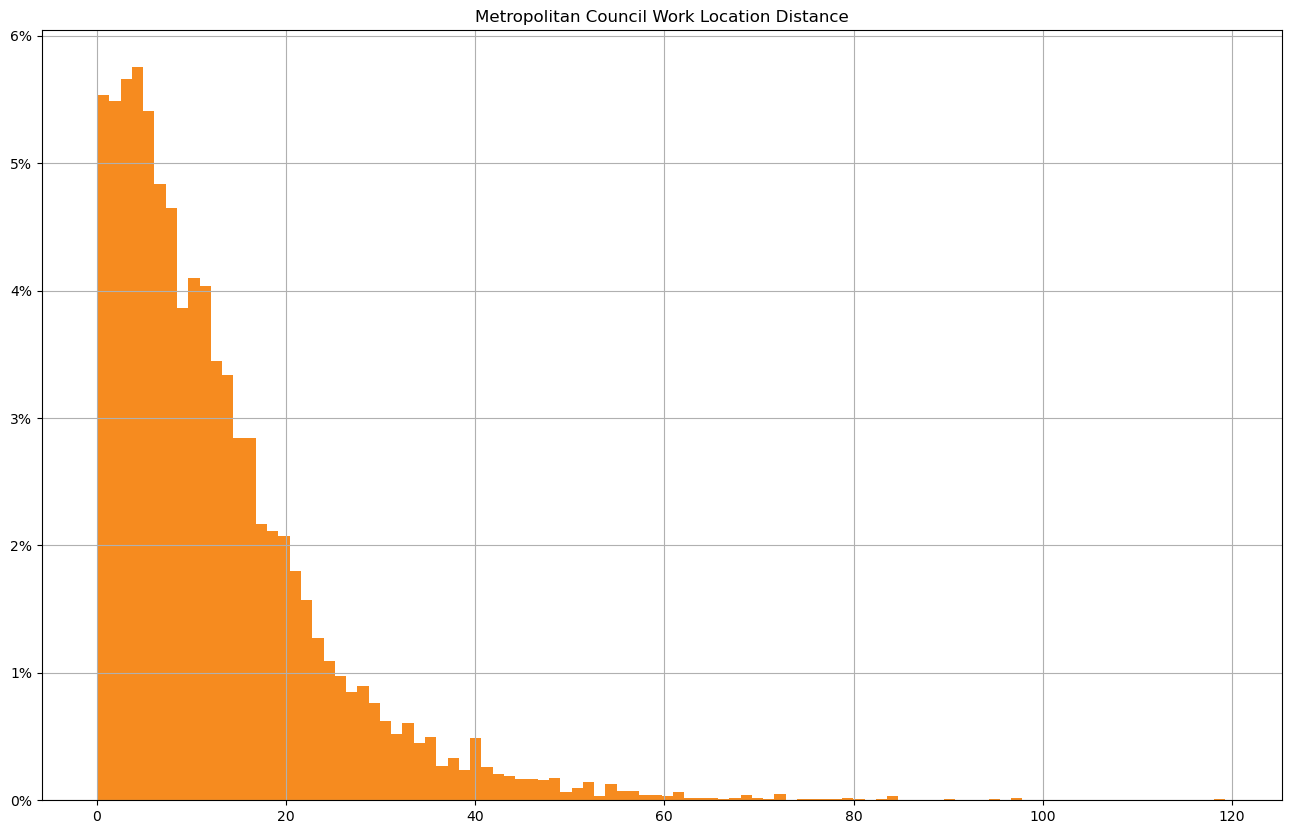

In [202]:
asim_work_qc = asim_per_df[(asim_per_df['workplace_zone_id'] >= 0) & (~asim_per_df['work_from_home'])].groupby(['HH_ID', 'PER_ID', 'ptype']).first().join(asim_hh_df.groupby('HH_ID').first()['home_zone_id'])
asim_work_qc['dist_to_work'] = dist_skim[asim_work_qc['home_zone_id'].astype(int) - 1, asim_work_qc['workplace_zone_id'].astype(int) - 1]

print(f"The average trip length to work is {asim_work_qc['dist_to_work'].mean()}")

plt
ax = asim_work_qc['dist_to_work'].hist(bins = 100, histtype = 'bar', color = ['#F68B1F'], label = ['1'], density = True, figsize = (16, 10))
ax.set_title('Metropolitan Council Work Location Distance')
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 

plt.show()

In [203]:
asim_work_qc.reset_index().ptype.value_counts().sort_index()

1    6655
2    1055
3     176
4      21
5      36
6     118
Name: ptype, dtype: int64